In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, minmax_scale, OrdinalEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import joblib 


We want to see what type of diabetic patients readmit less than 30 days

In [143]:
df = pd.read_csv('./data/diabetic_data.csv')
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [144]:
print(f'\nThe are {df.columns.shape[0]} features.')
print(f'\n {df.select_dtypes(include=['int64','float64','number']).shape[1]} numerical features.')
print(f'\n {df.select_dtypes(include=['object','category']).count().shape[0]} categorical features.\n')
df.info()


The are 50 features.

 13 numerical features.

 37 categorical features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-nu

In [145]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [146]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [147]:
# Check the data in missing column
df['max_glu_serum'].unique()

array([nan, '>300', 'Norm', '>200'], dtype=object)

In [148]:
# Check the data in missing column
df['A1Cresult'].unique()

array([nan, '>7', '>8', 'Norm'], dtype=object)

In [149]:
# Check what would be the most frequnt value
df['A1Cresult'].mode()

0    >8
Name: A1Cresult, dtype: object

In [150]:
# Check what would be the most frequent value in this column
df['max_glu_serum'].mode()

0    Norm
Name: max_glu_serum, dtype: object

In [151]:
# Decided to go with 'Norm' for missing values
df.fillna(df['max_glu_serum'].mode()[0], inplace=True)

#Decided to go with more frequent value for missing data in this column
df.fillna(df['A1Cresult'].mode()[0], inplace=True)

# Check the missing values again
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

----------

## Feature Engineering

----------

In [152]:
# Figure out how to merge these columns in one
df['diag_1'].unique()
df['diag_2'].unique()
df['diag_3'].unique()


array(['?', '255', 'V27', '403', '250', 'V45', '38', '486', '996', '197',
       '250.6', '427', '627', '414', '416', '714', '428', '582', 'V43',
       '250.01', '263', '250.42', '276', '482', '401', '250.41', '585',
       '781', '278', '998', '568', '682', '618', '250.02', '305', '707',
       '496', '599', '715', '424', '518', '553', '794', '411', 'V42',
       '531', '511', '490', '562', '250.8', '250.7', '250.52', '784',
       '491', '581', '420', '8', '724', '730', '789', '131', '250.82',
       '999', '41', '493', '250.03', '753', '786', '529', 'E888', '425',
       '595', '303', '560', '711', '492', '332', '296', '438', '362',
       '250.4', '654', '244', 'V70', '737', '625', '681', '250.51', '404',
       'V10', '810', '280', '440', '785', '588', '569', '272', '997',
       '250.43', '918', '584', '54', '788', '426', '722', '250.92', '196',
       '461', '535', '787', '891', '284', '458', '648', '780', '182',
       '285', '593', '413', '664', '564', '201', '356', 'V15', '2

In [153]:
# To evaluate if we need to keep this feature or not
df['acetohexamide'].value_counts()

acetohexamide
No        101765
Steady         1
Name: count, dtype: int64

In [154]:
# To evaluate this feature
df['acetohexamide'].unique()

array(['No', 'Steady'], dtype=object)

In [155]:
# # Another categorical conversion to numeric these three features to the most frequent usages the convert to numeric
# df['diag_1'] = pd.to_numeric(df['diag_1'], errors='coerce')
# df['diag_2'] = pd.to_numeric(df['diag_2'], errors='coerce')
# df['diag_3'] = pd.to_numeric(df['diag_3'], errors='coerce')
# df['diag_1'].unique(), df['diag_2'].unique(), df['diag_3'].unique()
# df['diag_1'].isnull().sum(), df['diag_2'].isnull().sum(),df['diag_3'].isnull().sum()

# df = df.dropna()
# df.isnull().sum()


## Features' distribusion

Here is the part I wasnted to see how is the distributions of each feature. I can decide if I need to remove the feature are they useful feature data or they can be removed.

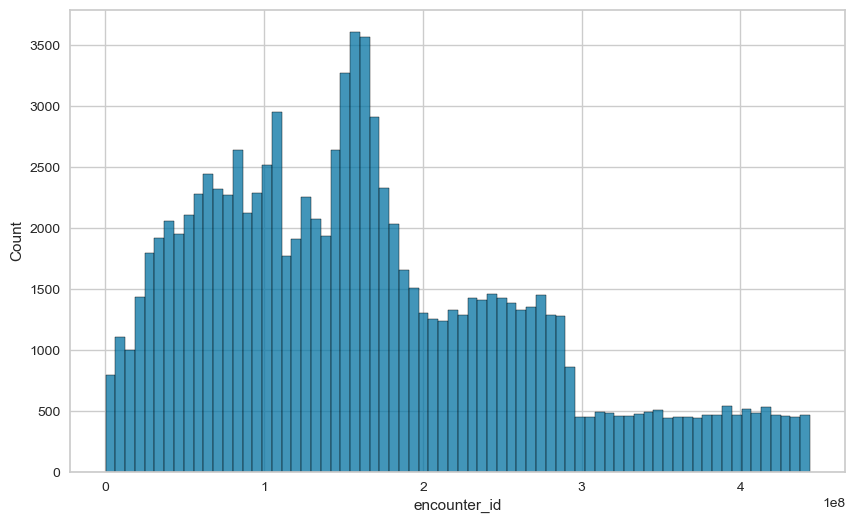

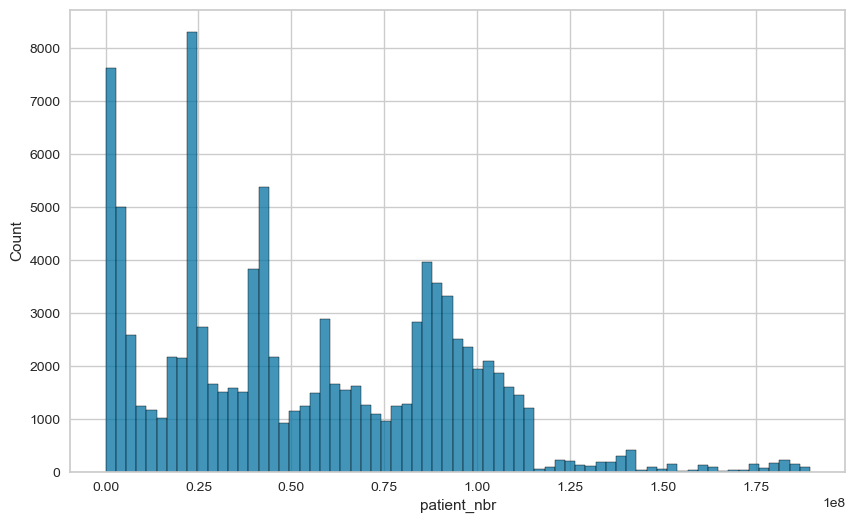

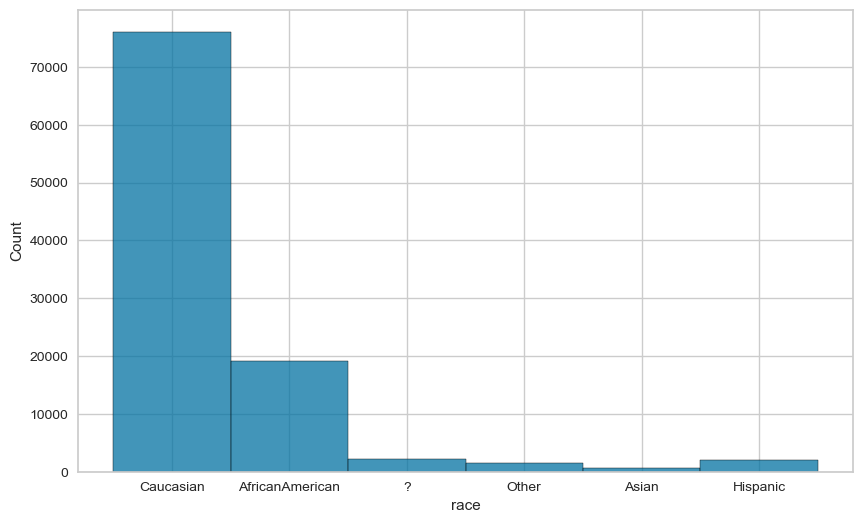

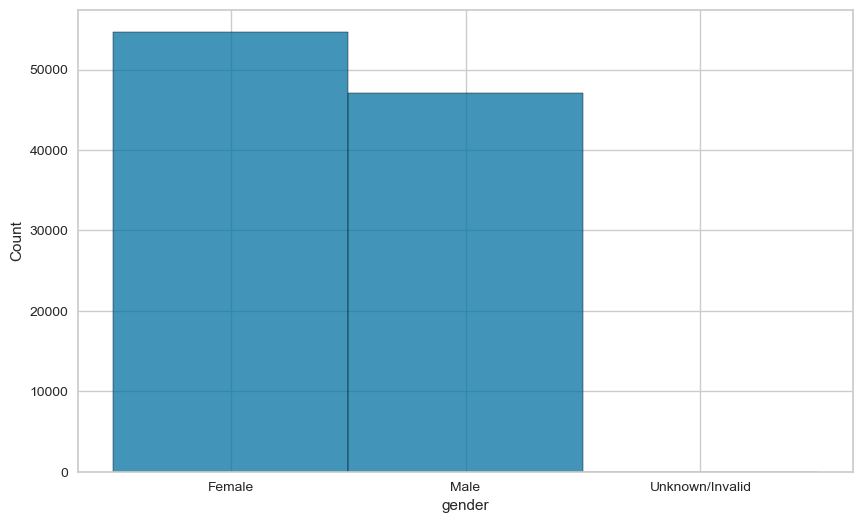

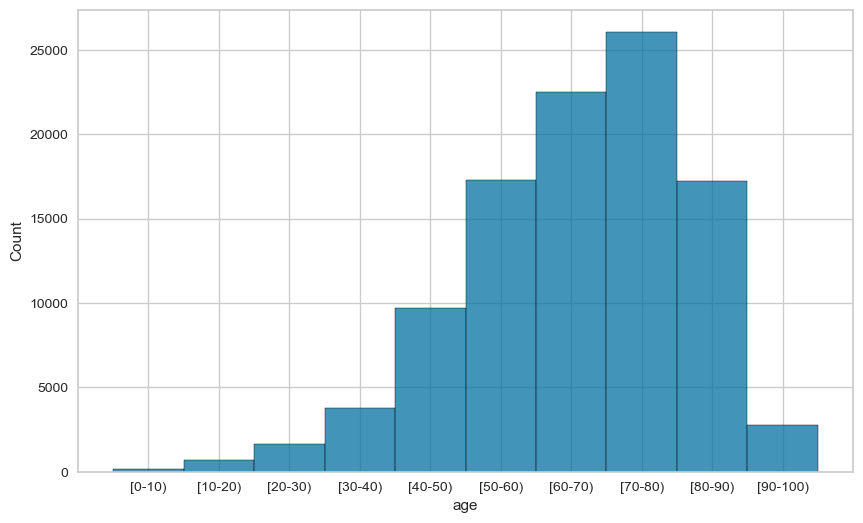

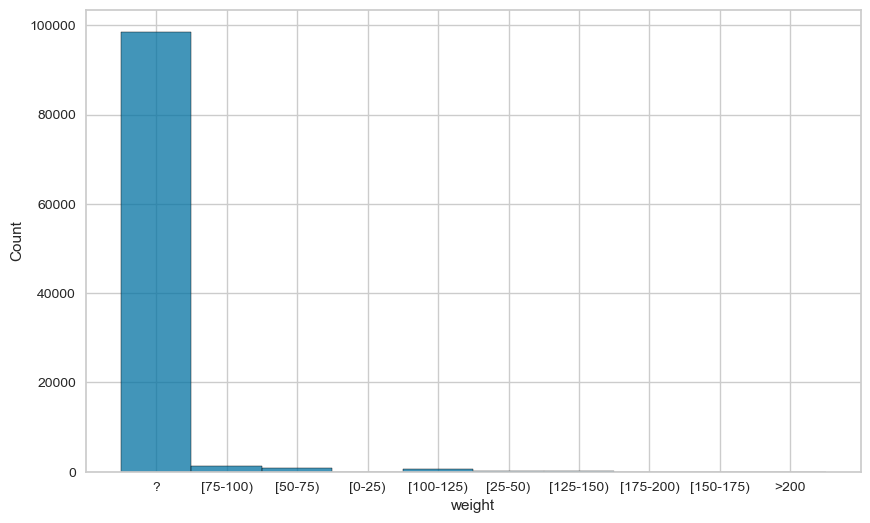

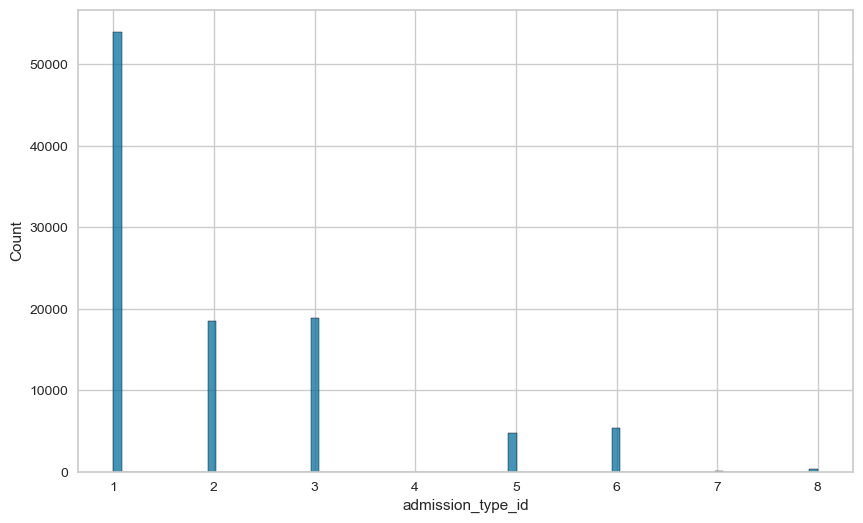

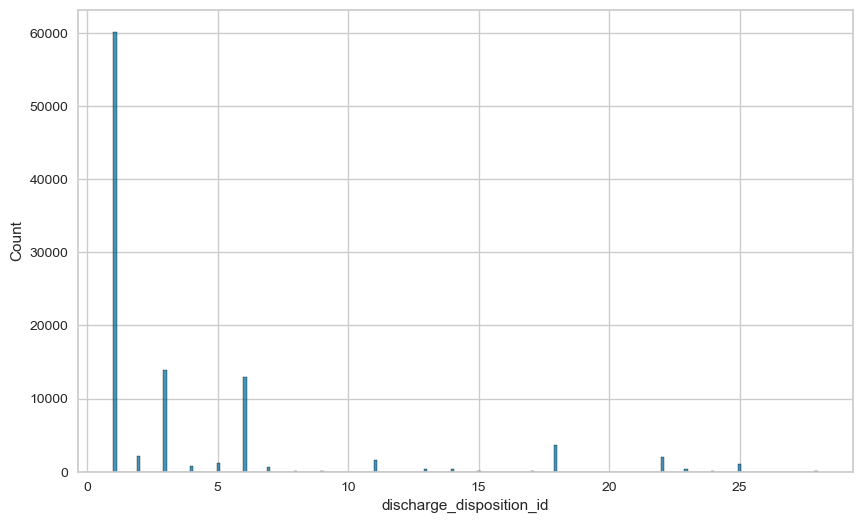

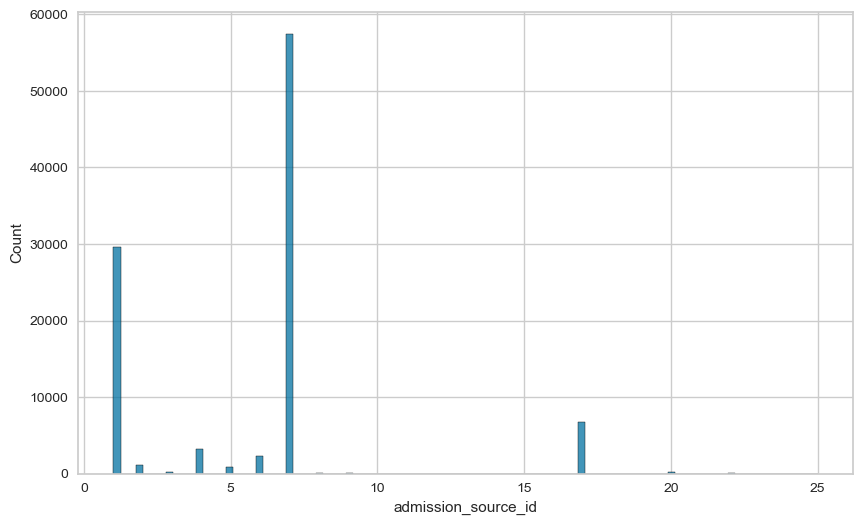

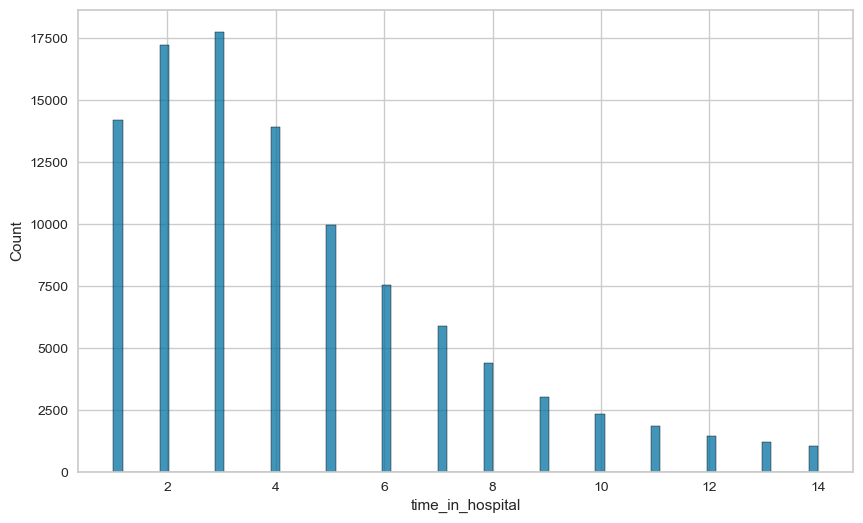

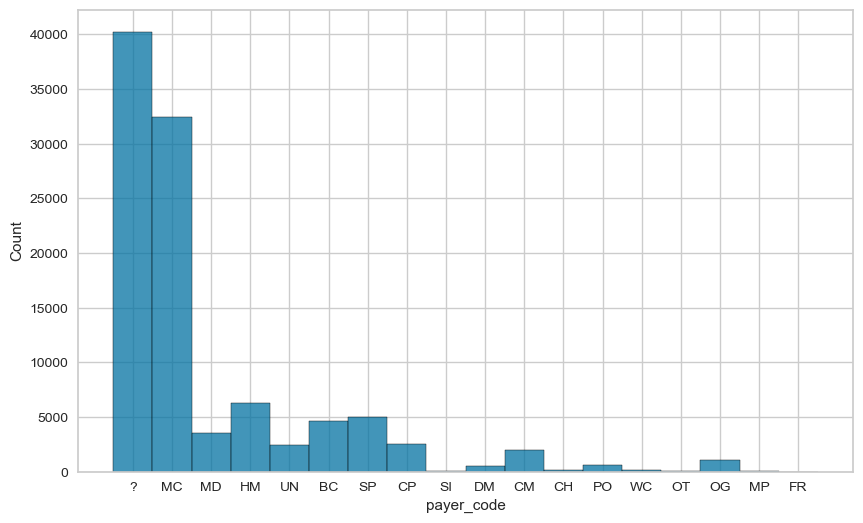

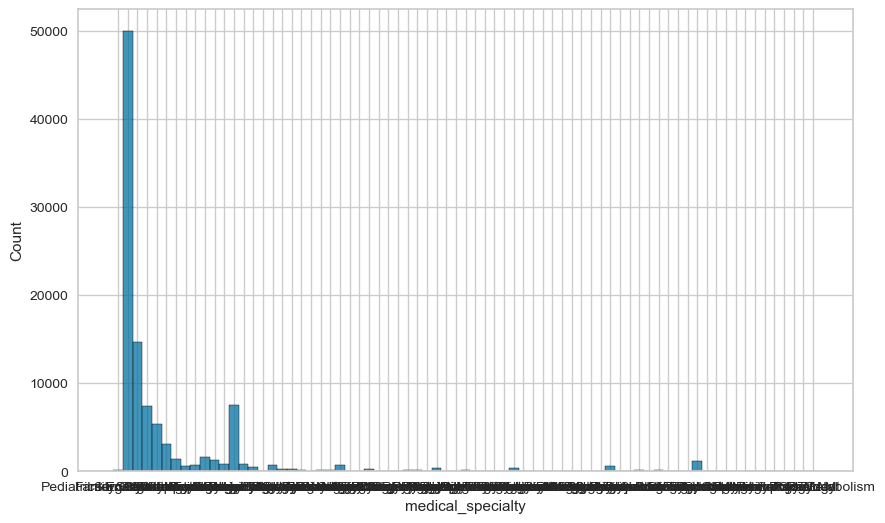

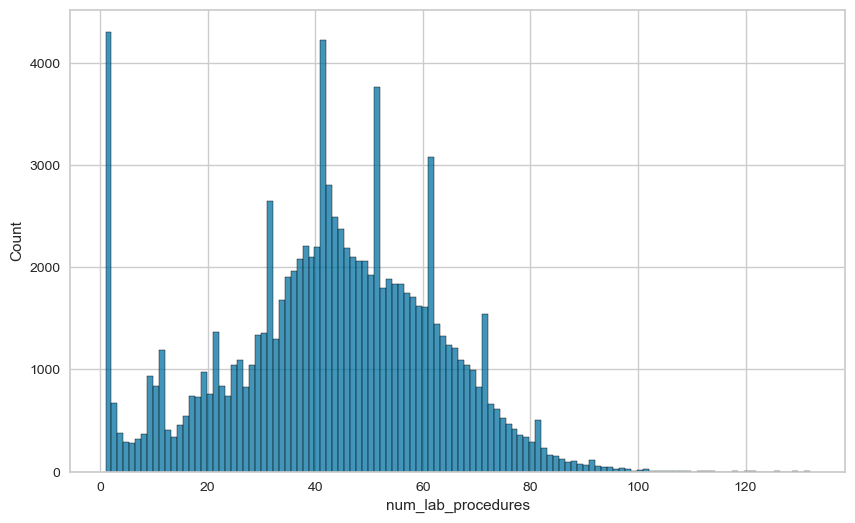

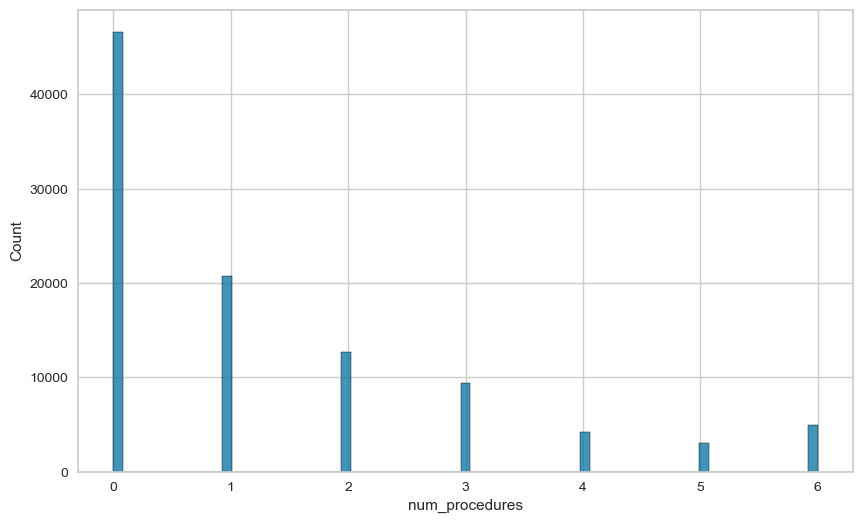

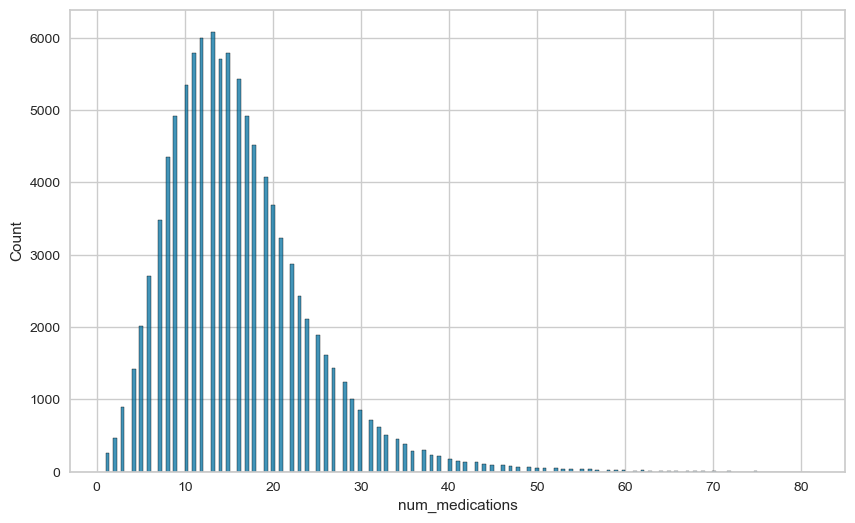

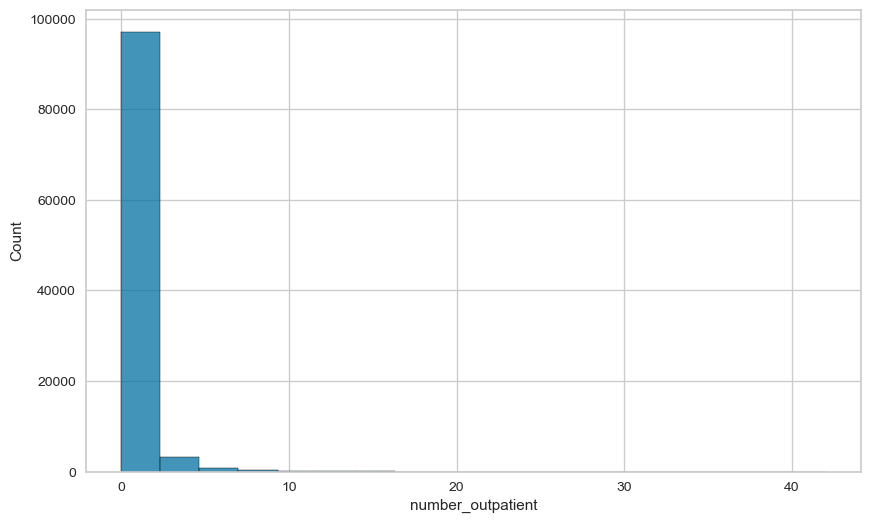

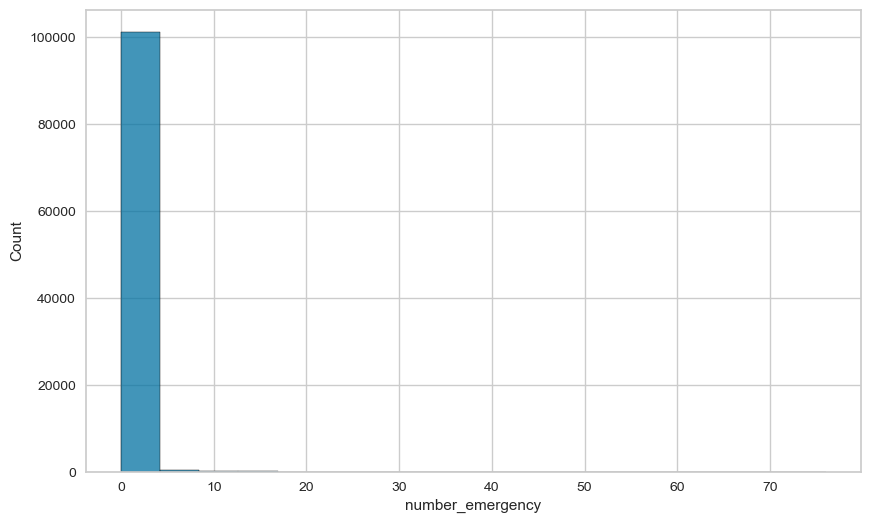

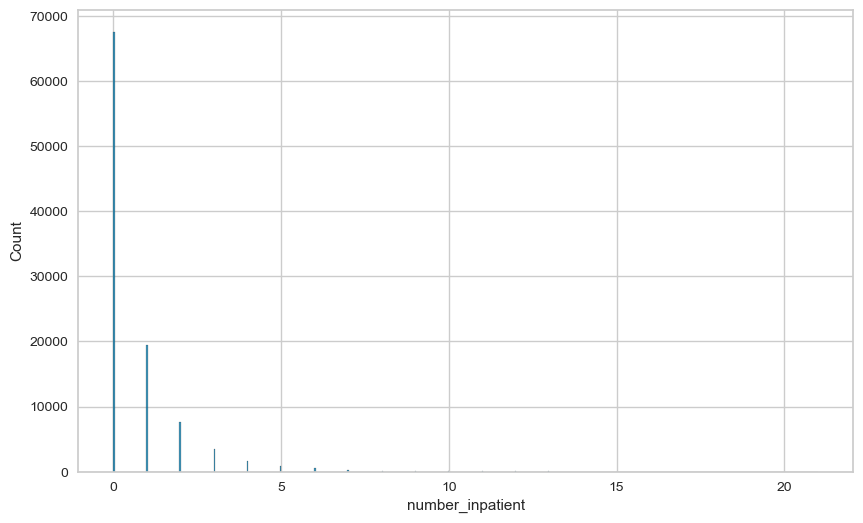

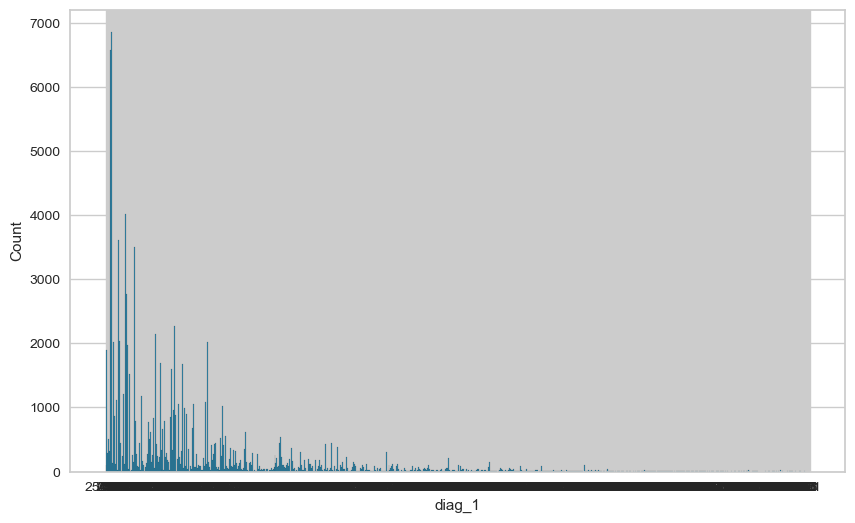

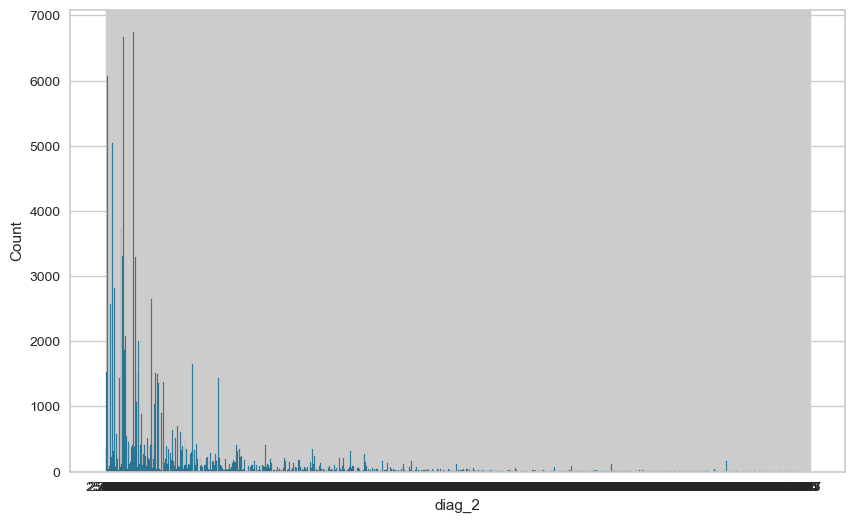

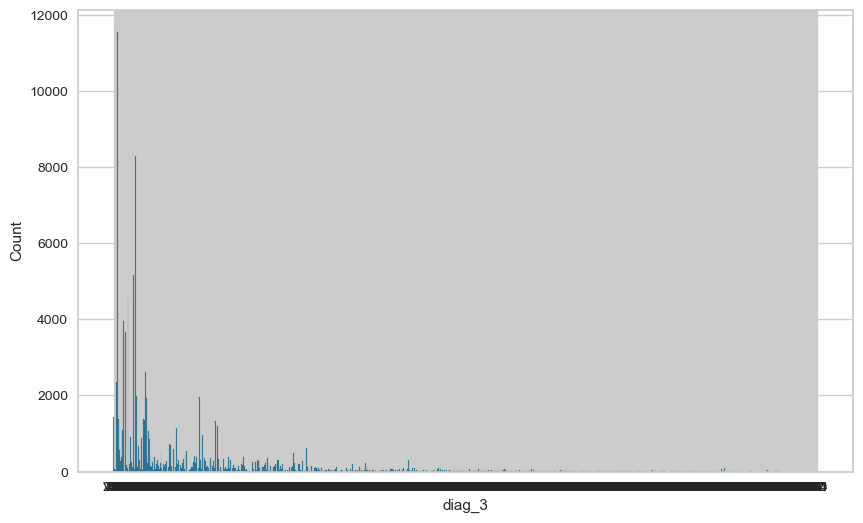

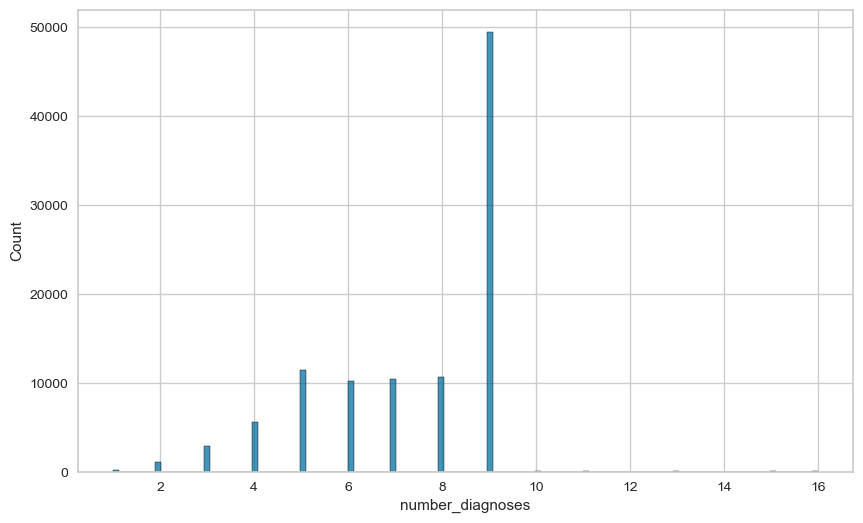

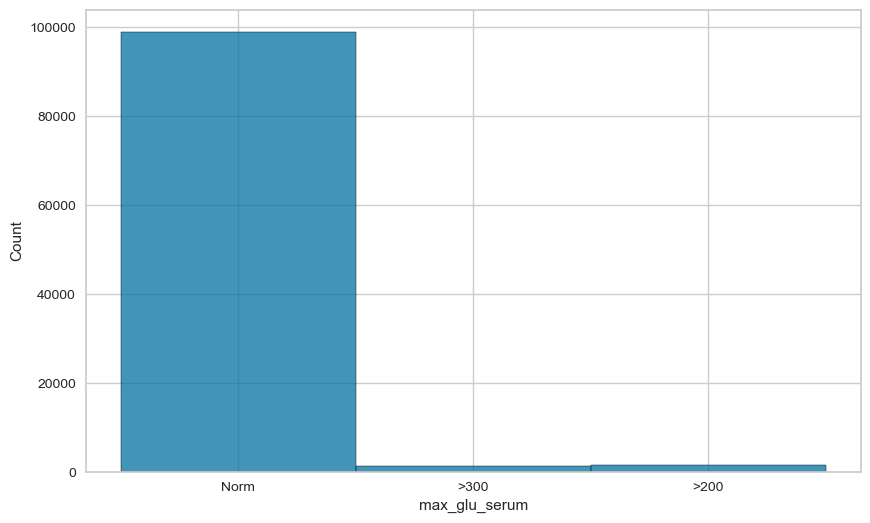

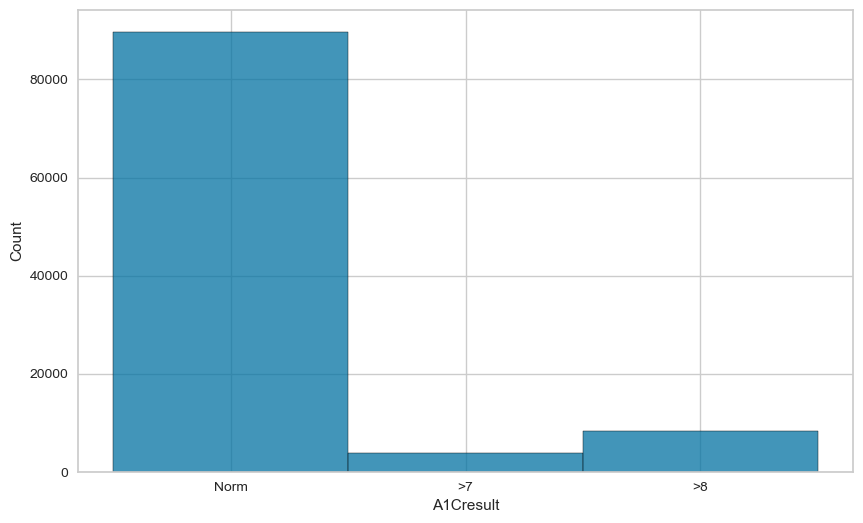

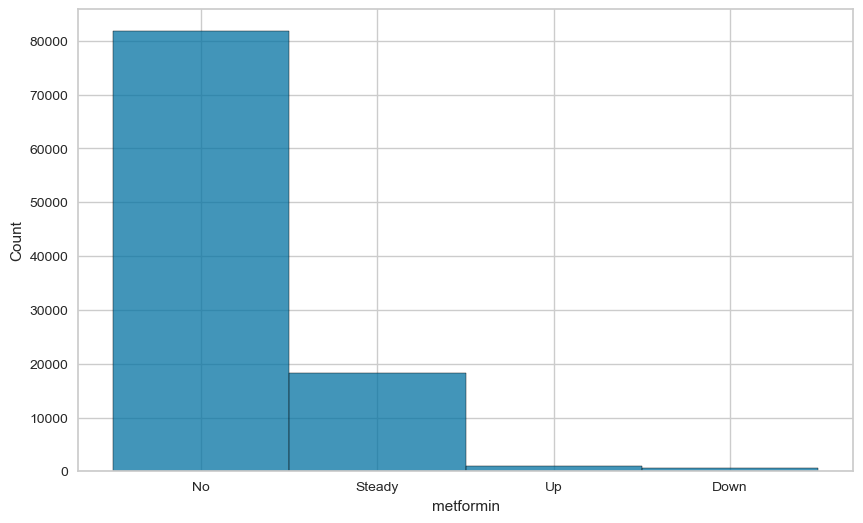

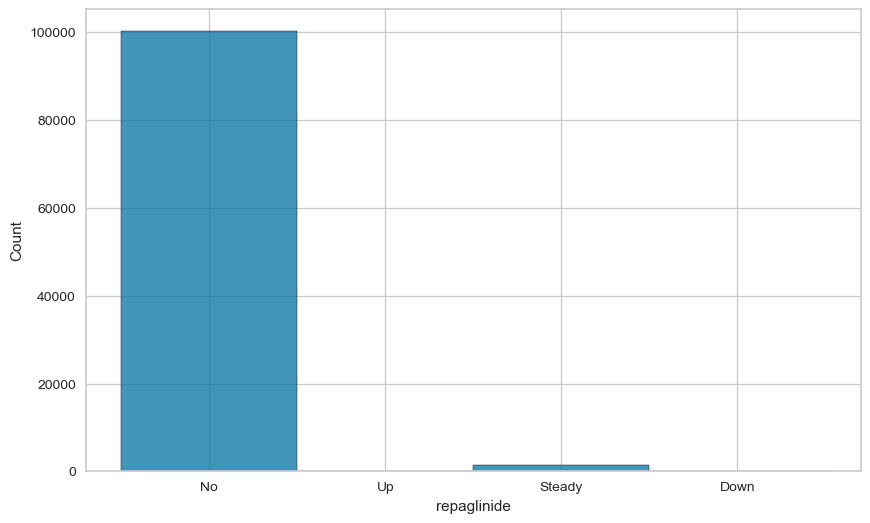

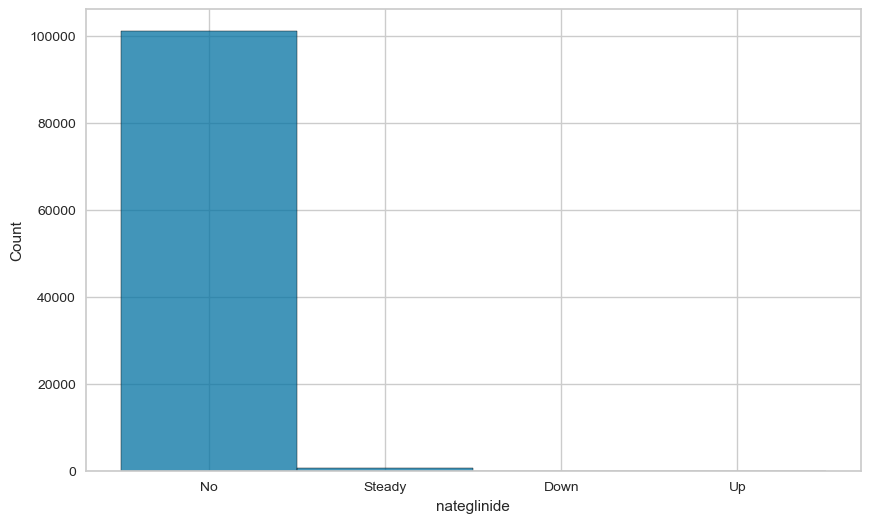

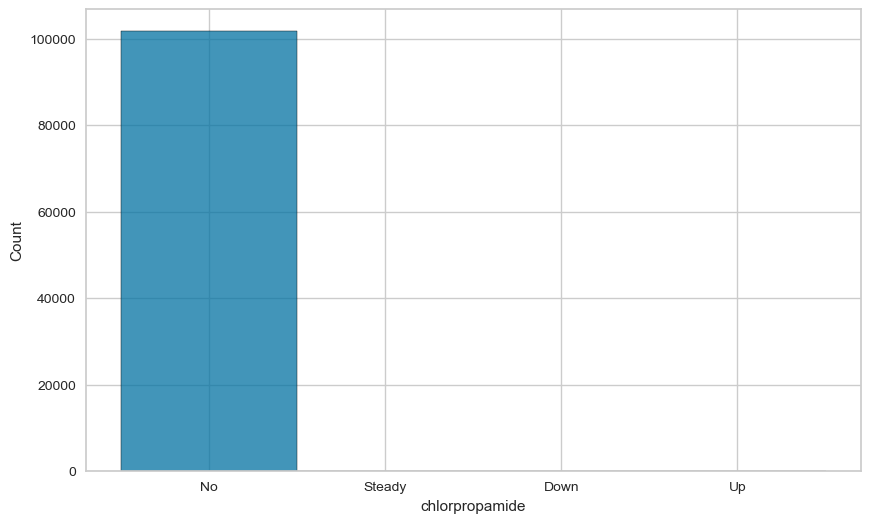

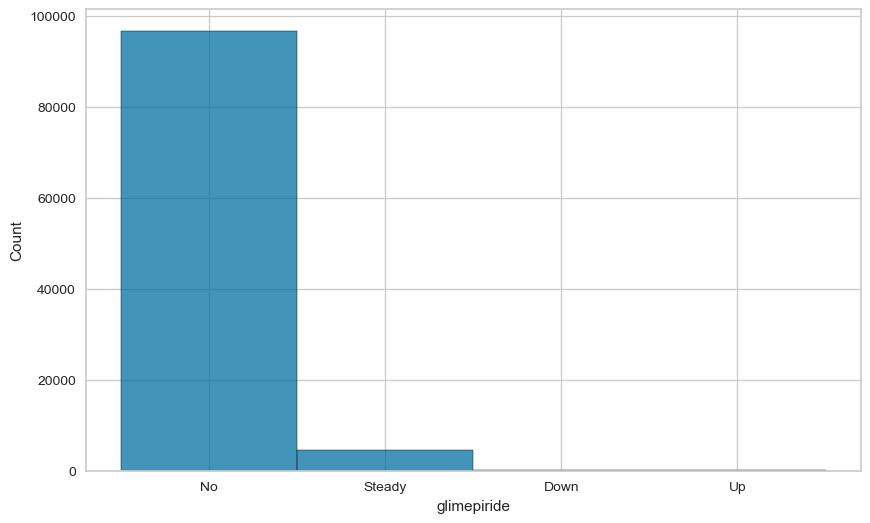

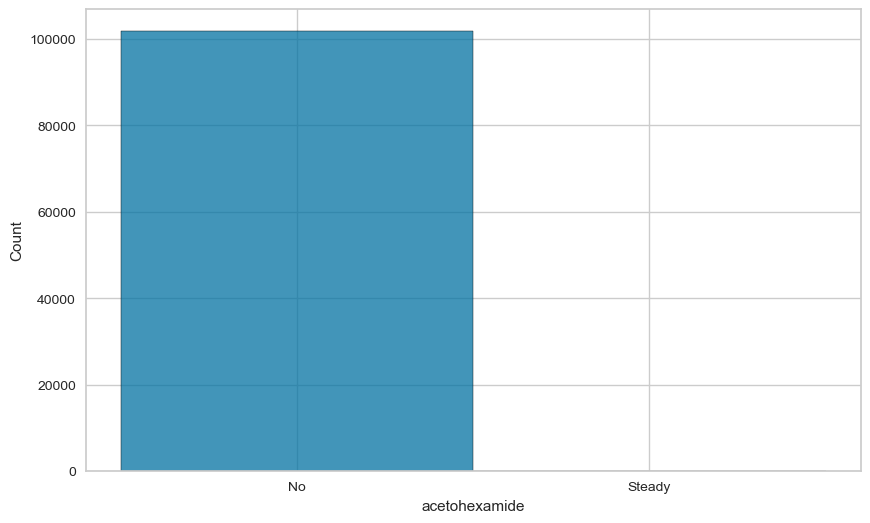

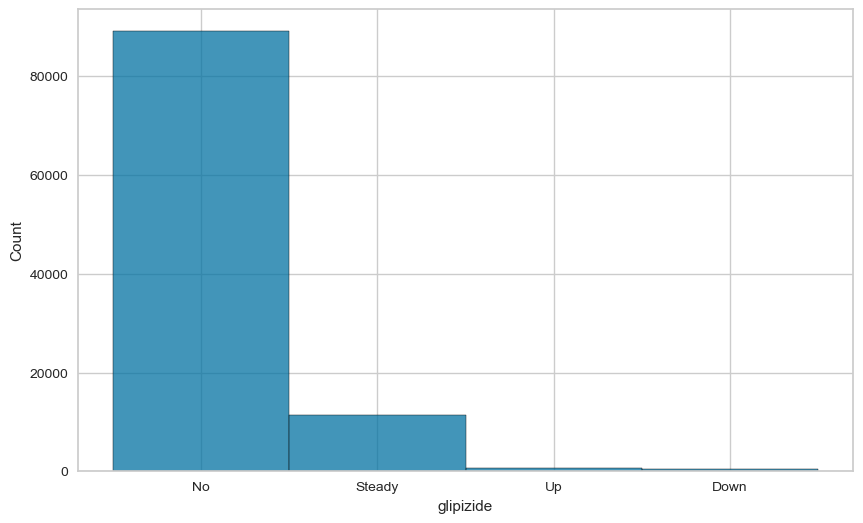

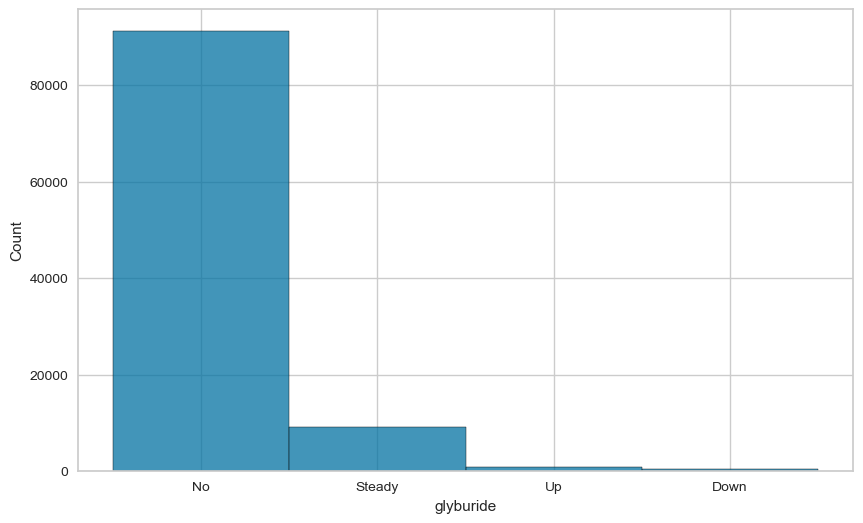

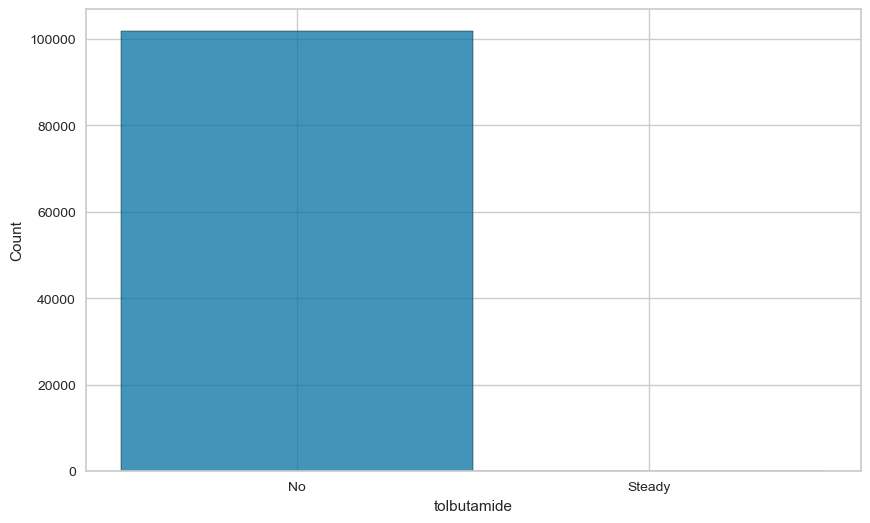

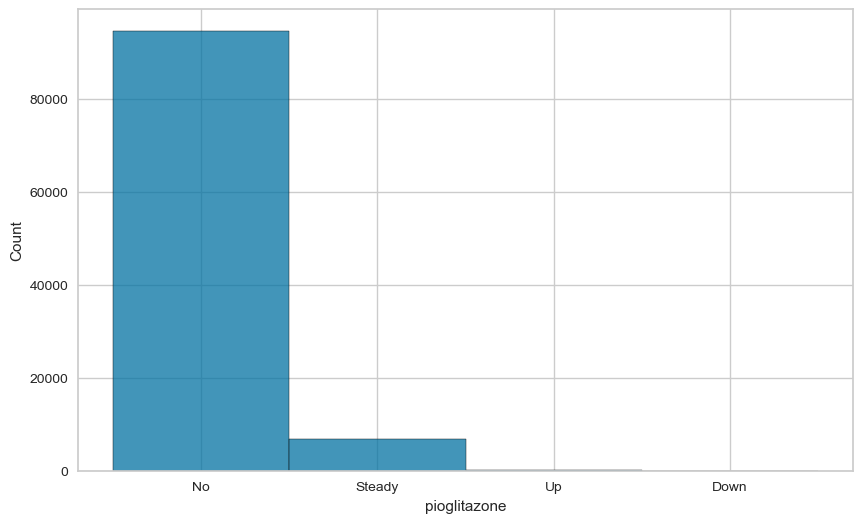

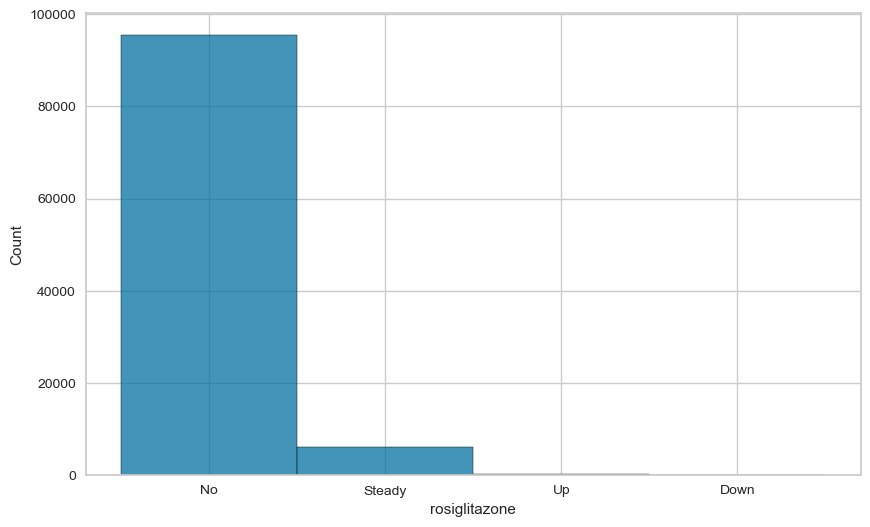

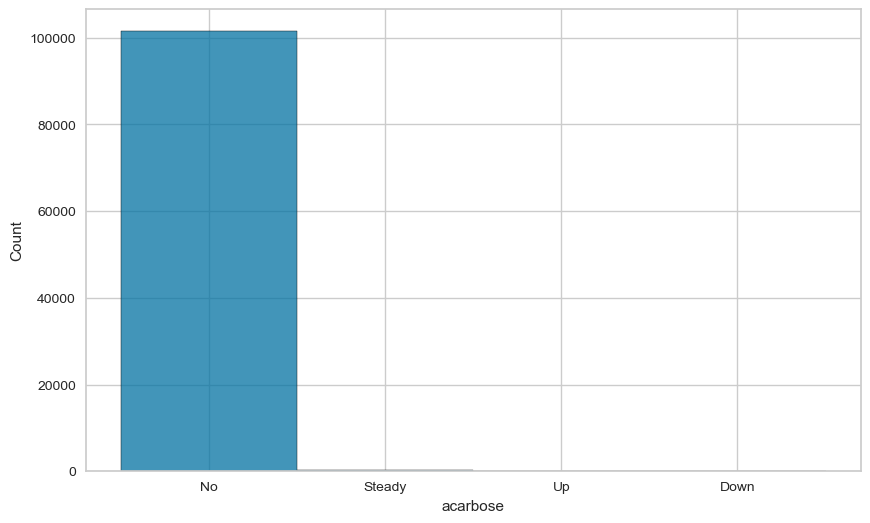

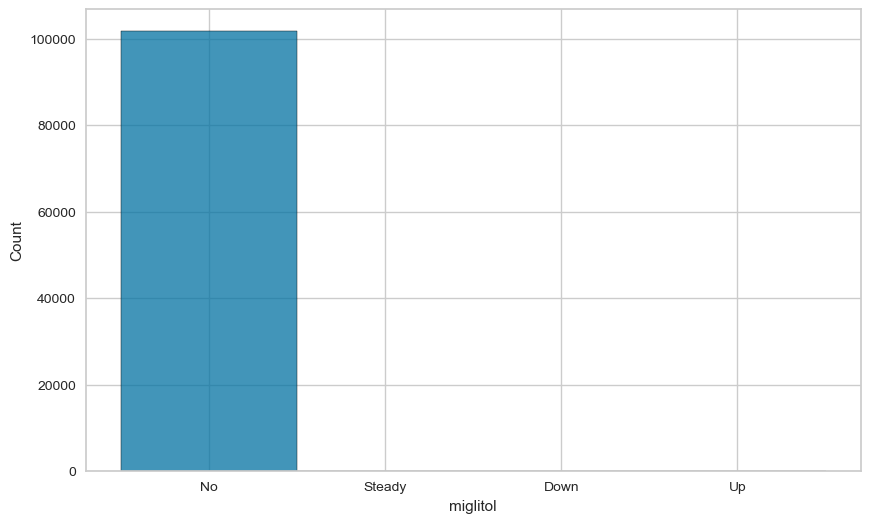

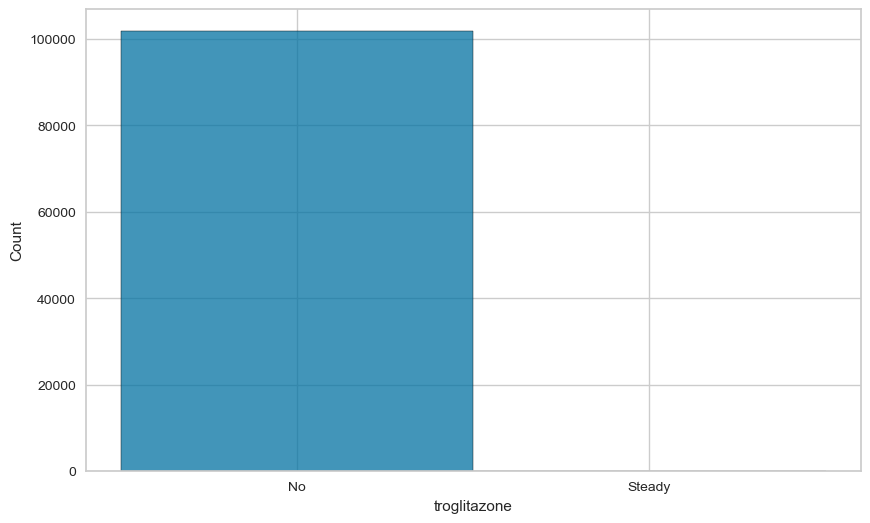

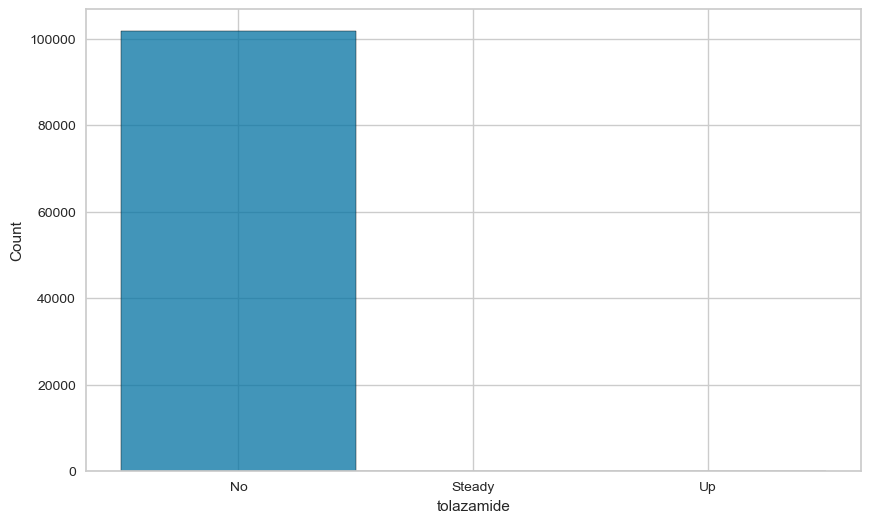

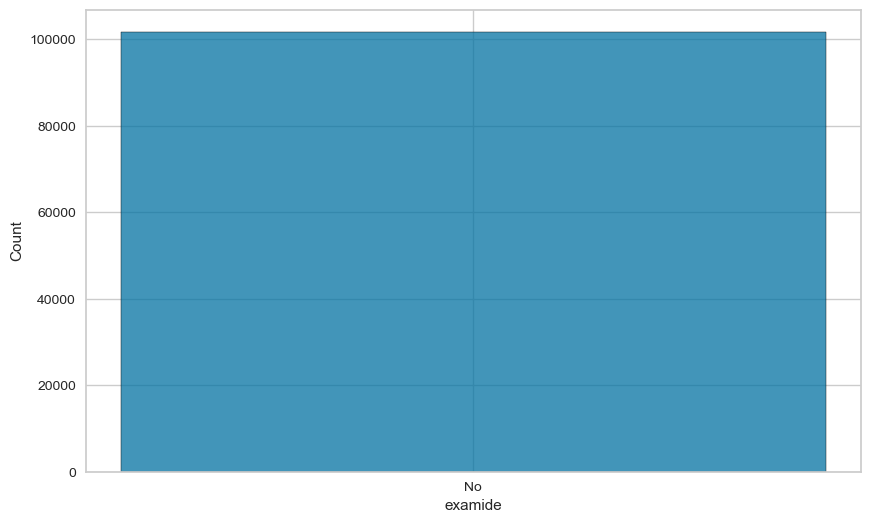

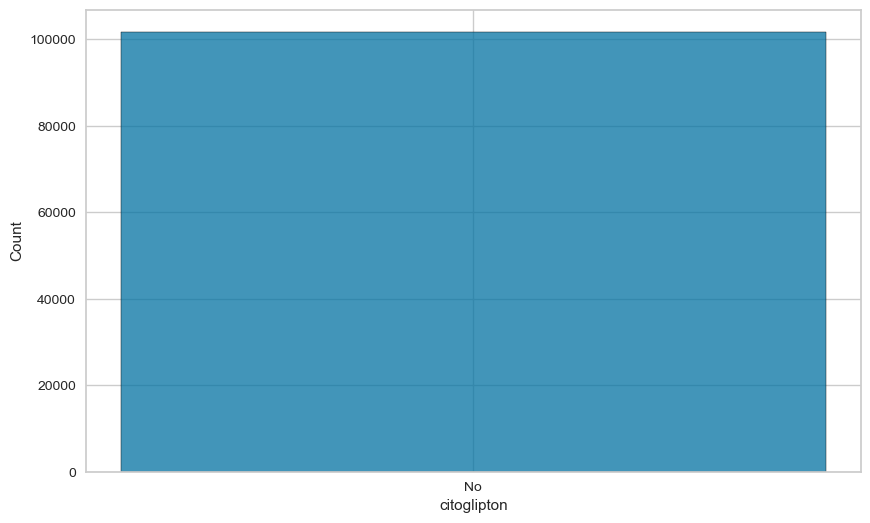

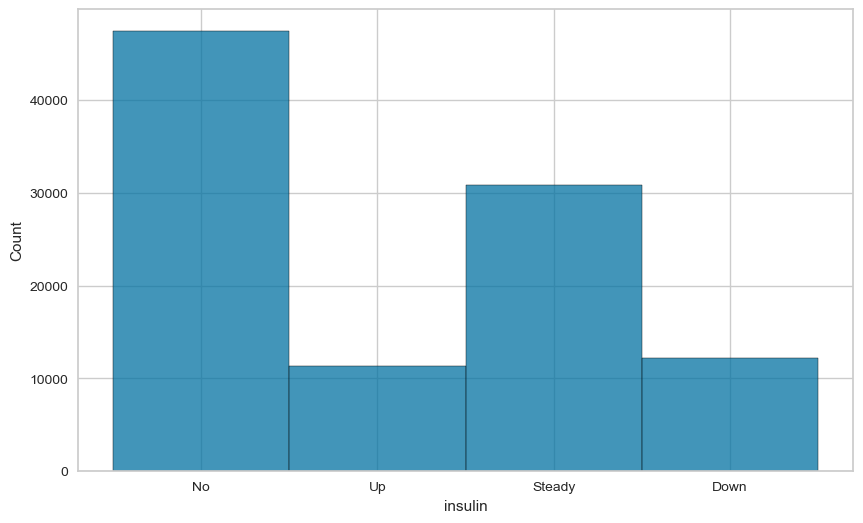

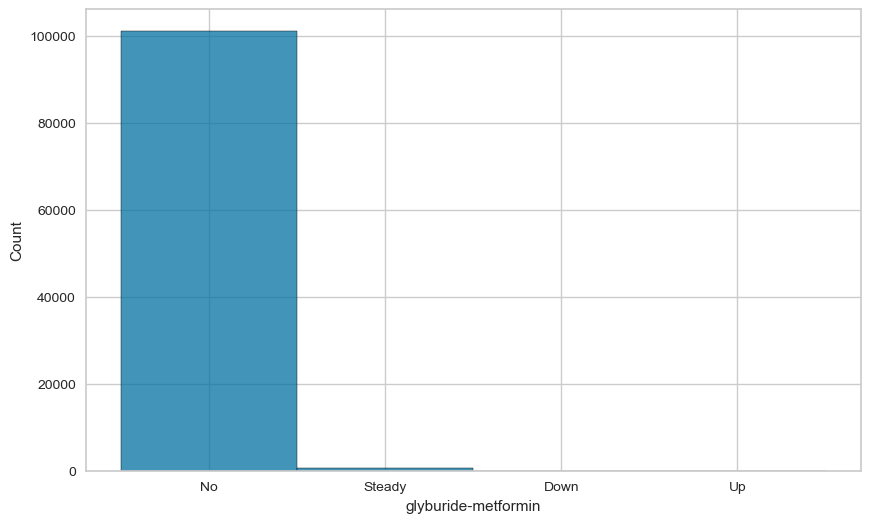

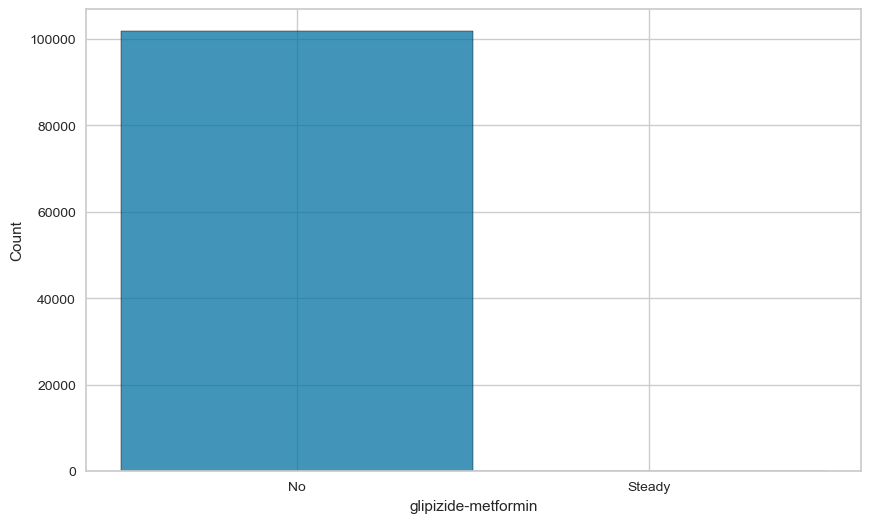

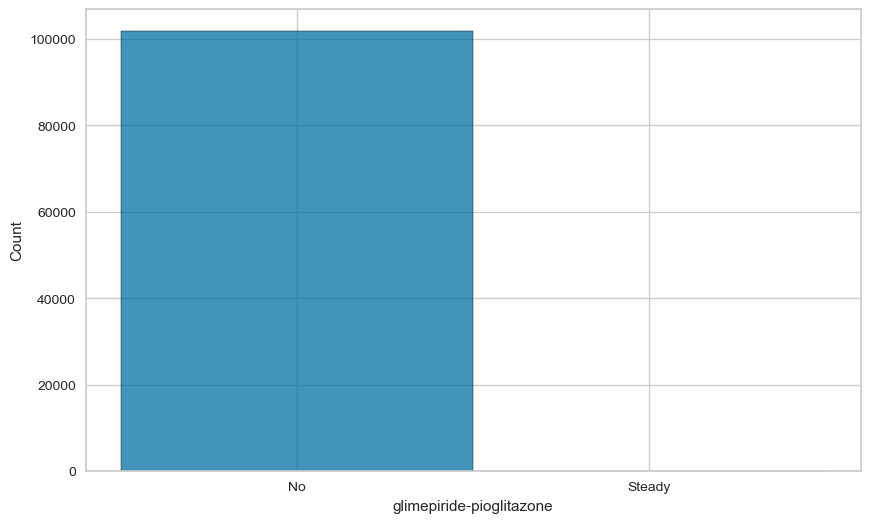

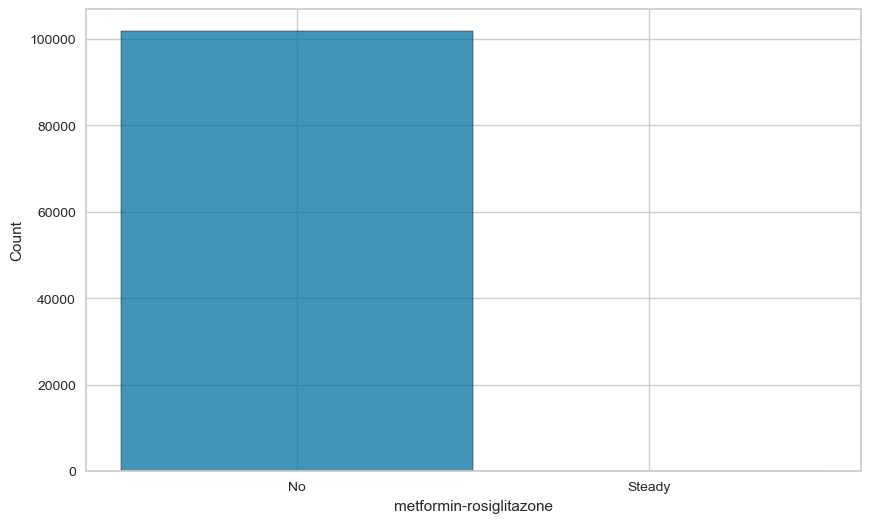

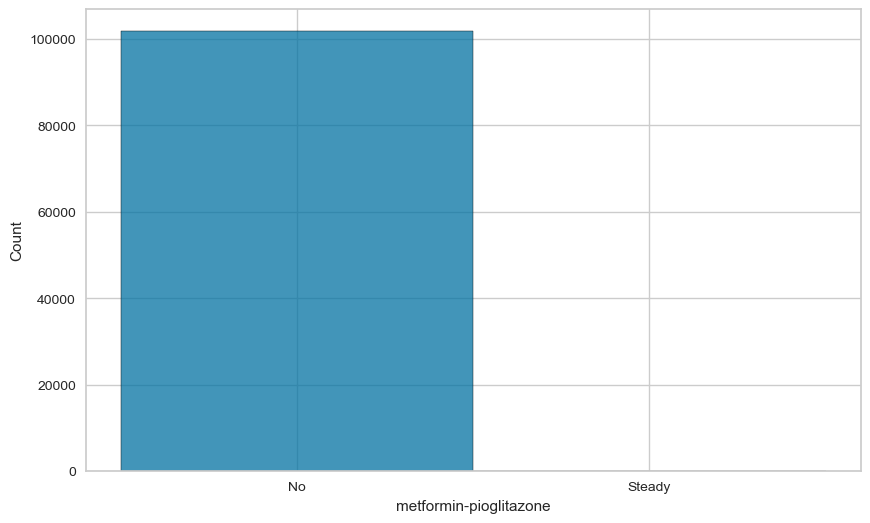

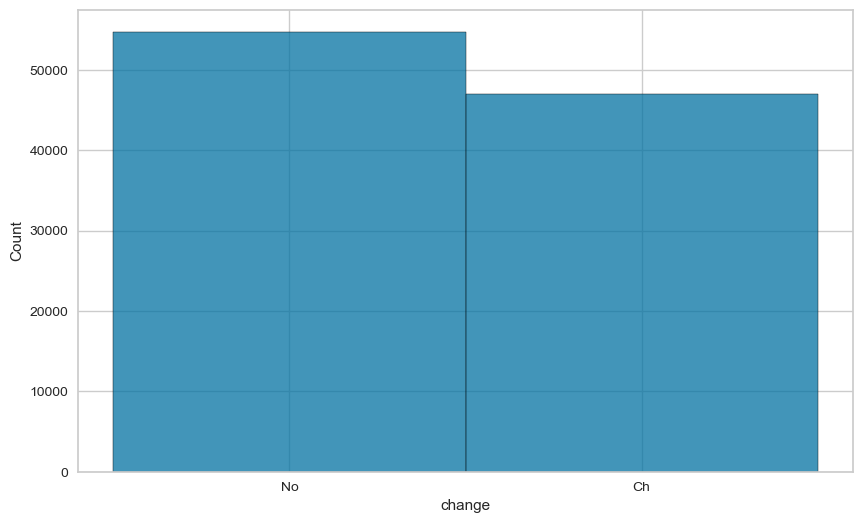

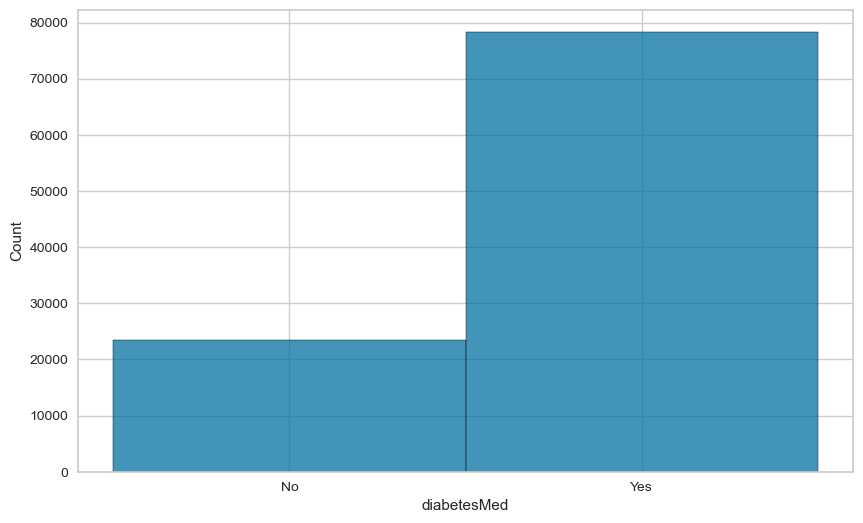

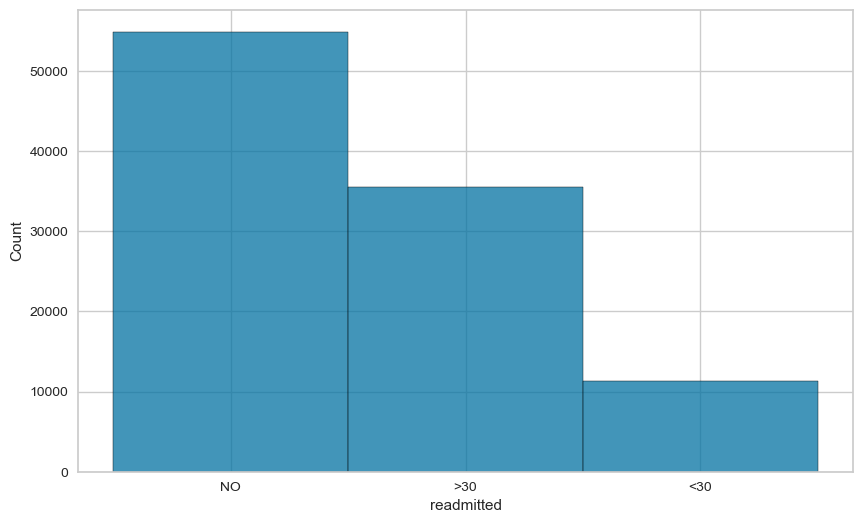

In [156]:
for col in df.columns:
    
    plt.figure(figsize=(10,6))
    sns.histplot(df[col])
    plt.show()

In [157]:
# These id features are irrelevant to 'readmitted' feature and they are not necessary to keep

df = df.drop(['encounter_id','patient_nbr', 'admission_type_id','discharge_disposition_id','admission_source_id'], axis=1)

# based on the distributions above I decided to remove these features 
df = df.drop(['payer_code','examide', 'citoglipton', 'glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','troglitazone','acetohexamide'], axis=1)


In [158]:
# I pass this to array to be able to check the column names quickly
np.array(df.columns)

array(['race', 'gender', 'age', 'weight', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted'],
      dtype=object)

In [159]:
# I would drop this feature as it is not relevant to readmitted column and it has high cardinality
print(df['medical_specialty'].unique())
df = df.drop(['medical_specialty'], axis=1)


['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'PhysicalMedicineandRehabilitation' 'InfectiousDiseases' 'Anesthesiology'
 'Rheumatology' 'AllergyandImmunology' 'Surgery-Maxillofacial'
 'Pediatrics-InfectiousDiseases

In [160]:
# Drop missing or invalid values
df = df.replace('?', np.nan).dropna()

In [161]:
# Number of categorical columns to encode.
categorical_col.shape

(3036, 27)

In [162]:
# OneHoTEncoder

#Select categorical columns to apply encoder
categorical_col = df.select_dtypes(include=['object'])

# Encoder instance with oneHotEncoder I got 2541 features So, I tried OrdinalEncoder
one_h_e = OneHotEncoder(sparse_output=False)
# one_h_e = OrdinalEncoder()

# Fit the encoder to categorical features
df_encode = one_h_e.fit_transform(df[categorical_col.columns])

# Convert to data frame to have accessible format
df_encode = pd.DataFrame(df_encode,  columns = one_h_e.get_feature_names_out())

# See how big is the encoded data frame
df_encode.shape


(3036, 1033)

In [163]:
# Join the categorical and numerical features and be prepared to fit the classification Model

# Select numerical columns (excluding target variable 'readmitted')
numerical_cols = [col for col in df.select_dtypes(include=['float64', 'int64', 'number']).columns if col != 'readmitted']

# Concatenate numerical and encoded categorical features
df_encoded_all = pd.concat([df_encode, df[numerical_cols].reset_index(drop=True)], axis=1)

# df_encoded_all.head(3)

In [164]:
# To get the idea of features' corrolations
df[numerical_cols].corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.291670,0.060111,0.479631,-0.052037,-0.012486,0.018923,0.204649
num_lab_procedures,0.291670,1.000000,0.013079,0.204128,-0.029025,0.040205,0.002083,0.221102
num_procedures,0.060111,0.013079,1.000000,0.365325,-0.030053,-0.069927,-0.086288,-0.009387
num_medications,0.479631,0.204128,0.365325,1.000000,0.011437,-0.010943,0.059865,0.217297
number_outpatient,-0.052037,-0.029025,-0.030053,0.011437,1.000000,0.114201,0.078440,0.082336
number_emergency,-0.012486,0.040205,-0.069927,-0.010943,0.114201,1.000000,0.353431,0.107750
number_inpatient,0.018923,0.002083,-0.086288,0.059865,0.078440,0.353431,1.000000,0.111121
number_diagnoses,0.204649,0.221102,-0.009387,0.217297,0.082336,0.107750,0.111121,1.000000


In [165]:
df_encoded_all

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Other,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),...,readmitted_>30,readmitted_NO,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2,68,3,15,0,0,0,6
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5,71,5,23,0,0,0,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3,56,3,15,0,0,0,5
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,11,78,0,18,0,0,1,7
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,9,72,5,17,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2,53,4,14,0,1,0,9
3032,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4,66,0,17,0,0,0,8
3033,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,8,72,1,18,2,0,0,9
3034,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4,37,0,7,0,0,0,5


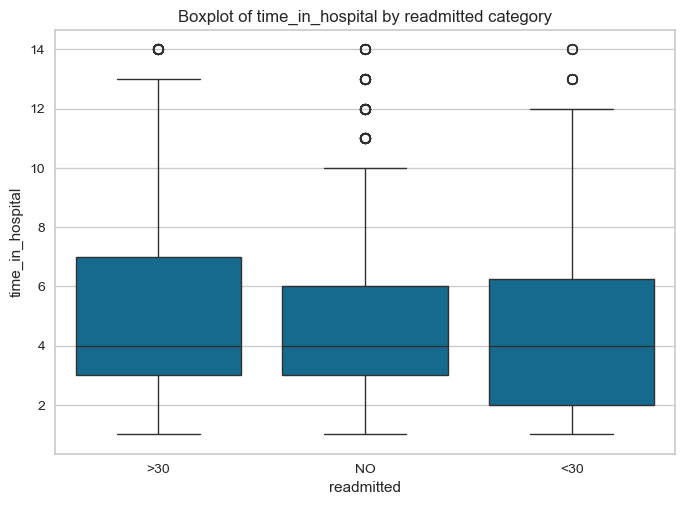

In [166]:
# Plotting outliers I might eliminate them if the clustering didn't go well.
sns.boxplot(data=df, x='readmitted', y='time_in_hospital')
plt.title("Boxplot of time_in_hospital by readmitted category")
plt.show()

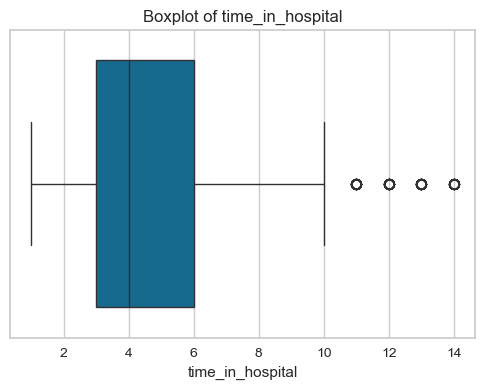

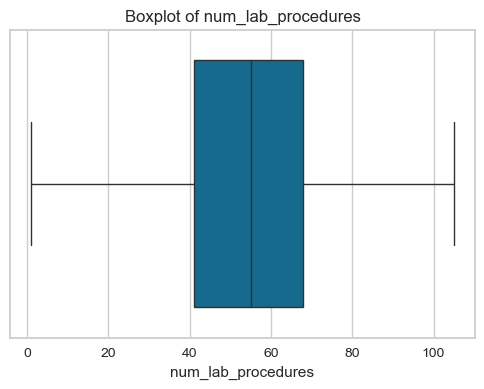

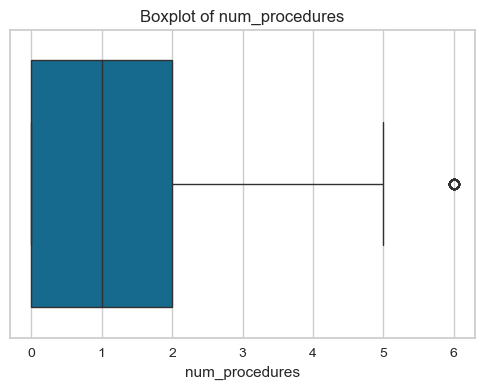

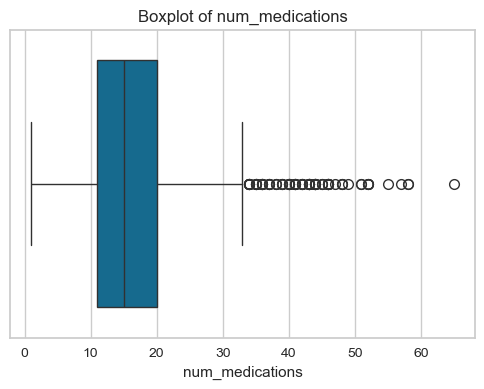

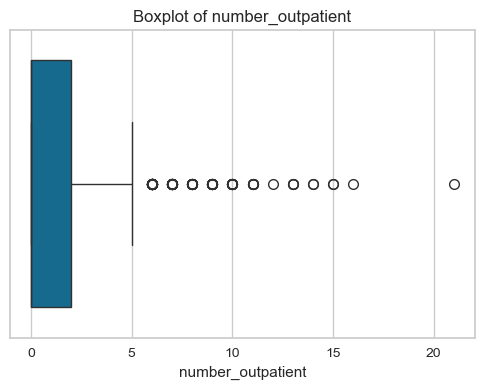

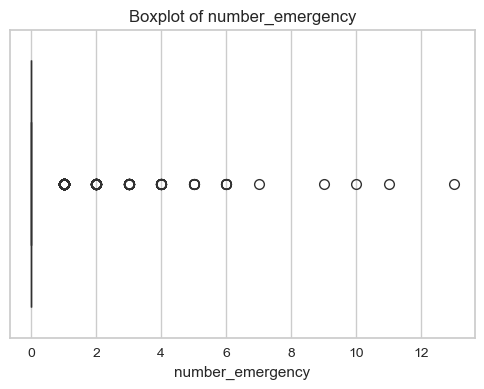

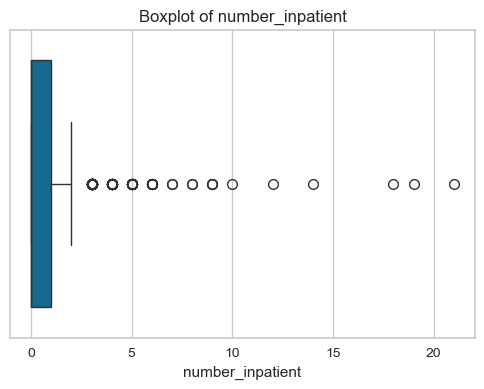

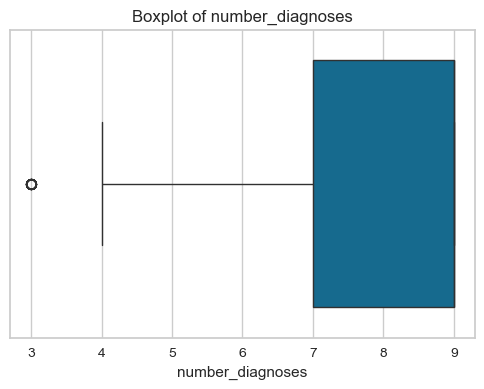

In [167]:
# I wanted to see how is the outliers in each feature
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

<Figure size 1500x900 with 0 Axes>

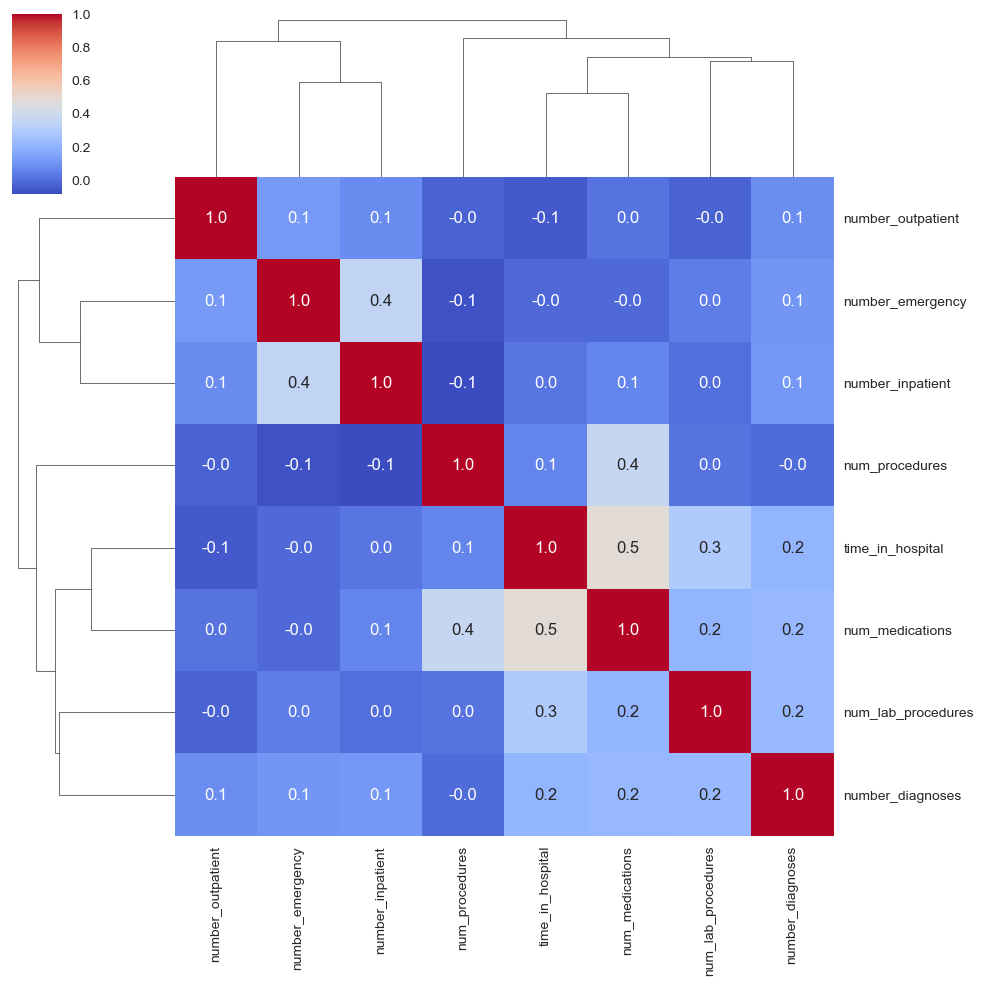

In [168]:
# Clustering map between the numerical columns
plt.figure(figsize=(15,9))
# numeric_categoric =[]
sns.clustermap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt= '.1f')

In the clustering map above we see higher connections/correlations between num_procedures/num_medications or time_in_hospital/num_medications, number_inpatient/number_ inpatient.


In [169]:
#Standar scaling of the data values
# Create instance of Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded_all)
X_scaled

array([[-0.19389168, -0.05452743,  0.22637698, ..., -0.31580926,
        -0.47996123, -1.45067852],
       [-0.19389168, -0.05452743,  0.22637698, ..., -0.31580926,
        -0.47996123, -0.74100079],
       [-0.19389168, -0.05452743,  0.22637698, ..., -0.31580926,
        -0.47996123, -2.16035625],
       ...,
       [-0.19389168, -0.05452743,  0.22637698, ..., -0.31580926,
        -0.47996123,  0.67835467],
       [-0.19389168, -0.05452743,  0.22637698, ..., -0.31580926,
        -0.47996123, -2.16035625],
       [-0.19389168, -0.05452743,  0.22637698, ..., -0.31580926,
        -0.47996123, -0.74100079]])

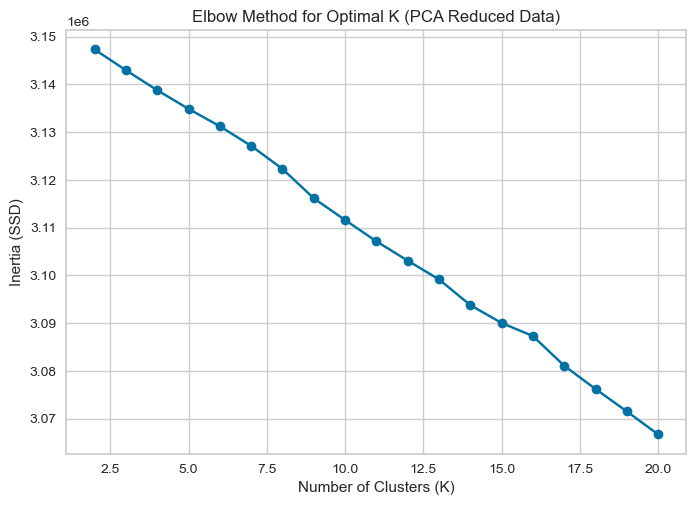

['kmean_model.joblib']

In [170]:
# List to store the sum of squared errors (inertia) for each K
ssd = []  

for k in range(2, 21):  # Testing K values from 2 to 20
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=25)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(2, 21), ssd, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSD)')
plt.title('Elbow Method for Optimal K (PCA Reduced Data)')
plt.savefig("elbow_method_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# Save the model to a file
joblib.dump(kmeans, 'kmean_model.joblib')

The biggest drop happens at K = 16 and K = 8 I would still try other methods to find the best K.


In [171]:
# Best k value
kmeans = KMeans(n_clusters=14, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

kmean_labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Using Silhouette_score to find out the scores  of K value clustering
# Compute Silhouette Score
score = silhouette_score(X_scaled, kmean_labels)
print("Silhouette Score:", score)


Silhouette Score: -0.046548669447638295


Kmean Silhouette Score: 0.07697793562726221  K=14

## Kmean Cluster, Find the best K with ElbowVisualizer 

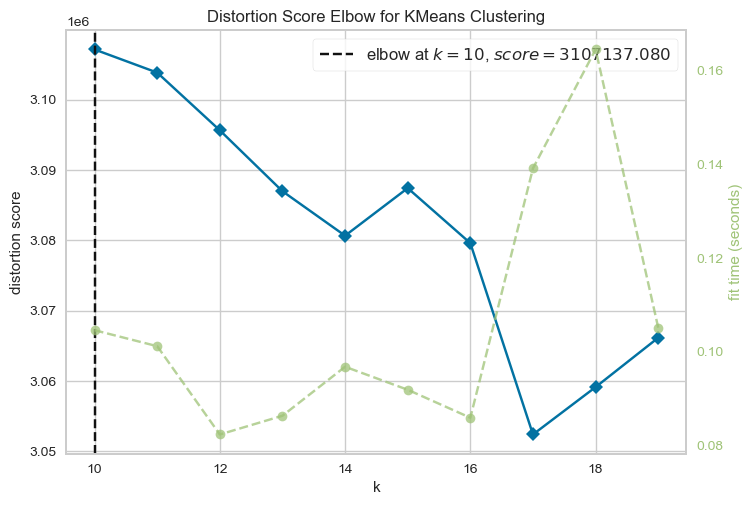

<Figure size 800x600 with 0 Axes>

In [172]:
# Create the Elbow Visualizer for max number of 14 clusters
Elbow_M = KElbowVisualizer(KMeans(), k=(10,20))

# Fit on X
Elbow_M.fit(X_scaled)

Elbow_M.show();

fig = plt.figure(figsize=(8, 6))
plt.savefig("ElbowVisualizer_plot.png", dpi=300, bbox_inches='tight')
plt.show()


With ElbowVisualizer K=11 is the best K value.

## Kmean Cluster with K=16

In [173]:
# figure out each cluster's proportion of <30 day readmissions with cluster K=14
df['cluster'] = kmean_labels
for cluster_id in range(16):
    cluster_data = df[df["cluster"] == cluster_id]
    cluster_size = len(cluster_data)
    print(cluster_data.iloc[:,:10])
    readmit_30 = cluster_data[cluster_data["readmitted"] == "<30"]
    readmit_30_count = len(readmit_30)
    proportion_30 = readmit_30_count / cluster_size if cluster_size > 0 else 0
    print(f"Cluster {cluster_id}: size={cluster_size}, <30 day readmissions={readmit_30_count} ({proportion_30:.2%})")
    cluster_data.iloc[:,:10]

            race  gender      age     weight  time_in_hospital  \
21933  Caucasian    Male  [50-60)  [125-150)                 6   
24513  Caucasian  Female  [70-80)  [100-125)                 2   
24709  Caucasian  Female  [60-70)    [50-75)                 7   
26471  Caucasian  Female  [50-60)  [100-125)                 6   
34165  Caucasian    Male  [60-70)   [75-100)                 6   
34753  Caucasian    Male  [80-90)   [75-100)                 9   
69200  Caucasian  Female  [80-90)    [50-75)                 7   
72528  Caucasian    Male  [80-90)   [75-100)                10   
79656  Caucasian  Female  [80-90)   [75-100)                 3   
80979  Caucasian    Male  [70-80)  [100-125)                 9   
97037  Caucasian  Female  [60-70)   [75-100)                13   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
21933                  28               3                9                  0   
24513                  41               2    

C:\Users\Masoum Saberi\AppData\Local\Temp\ipykernel_11240\3216456280.py:15: UserWarning: The palette list has more values (16) than needed (14), which may not be intended.
  ax = sns.scatterplot(df, x=df.index, y='cluster', hue='cluster', legend=True, palette=palette)


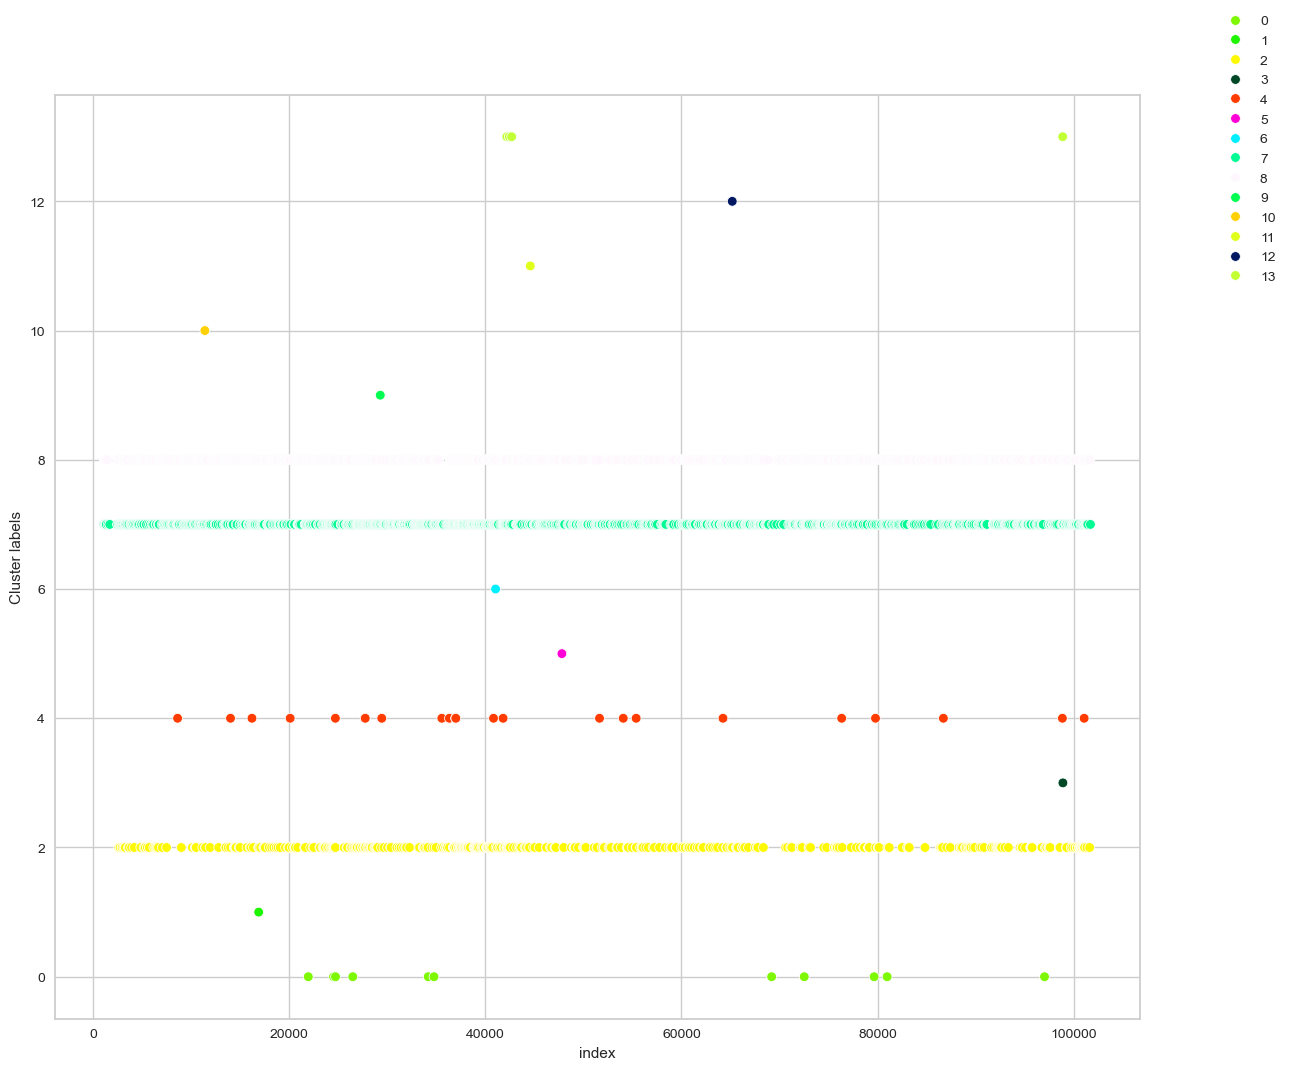

In [174]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.get_cmap("gist_ncar", 16) 
palette = [cmap(i) for i in range(16)]

cmap = plt.get_cmap("gist_ncar", 16 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 16, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df, x=df.index, y='cluster', hue='cluster', legend=True, palette=palette)

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('Cluster labels')

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()

-------------------------------------
## Kmean with k=8

---------------------------------

In [175]:
# Best k value
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

df['cluster_8'] = kmeans.labels_
centers_8 = kmeans.cluster_centers_

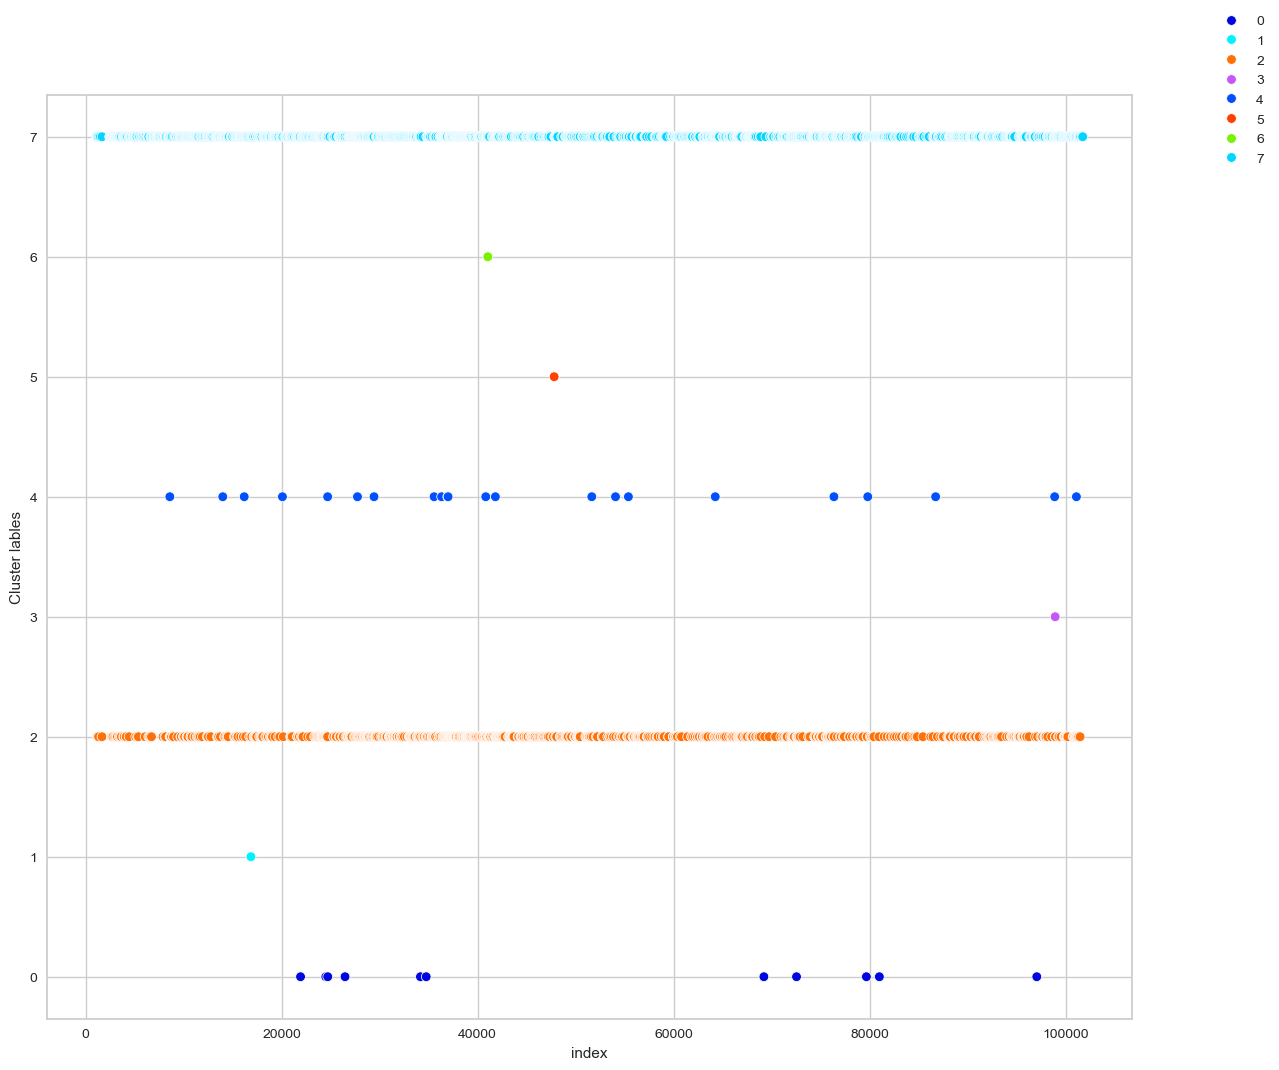

In [176]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.get_cmap("gist_ncar", 8) 
palette = [cmap(i) for i in range(8)]

cmap = plt.get_cmap("gist_ncar", 8 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 8, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df, x=df.index, y='cluster_8', hue='cluster_8', legend=True, palette=palette)

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('Cluster lables')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()

## Kmean with K=11

In [177]:
# Best k value
kmeans = KMeans(n_clusters=11, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

df['cluster_11'] = kmeans.labels_
centers_11 = kmeans.cluster_centers_


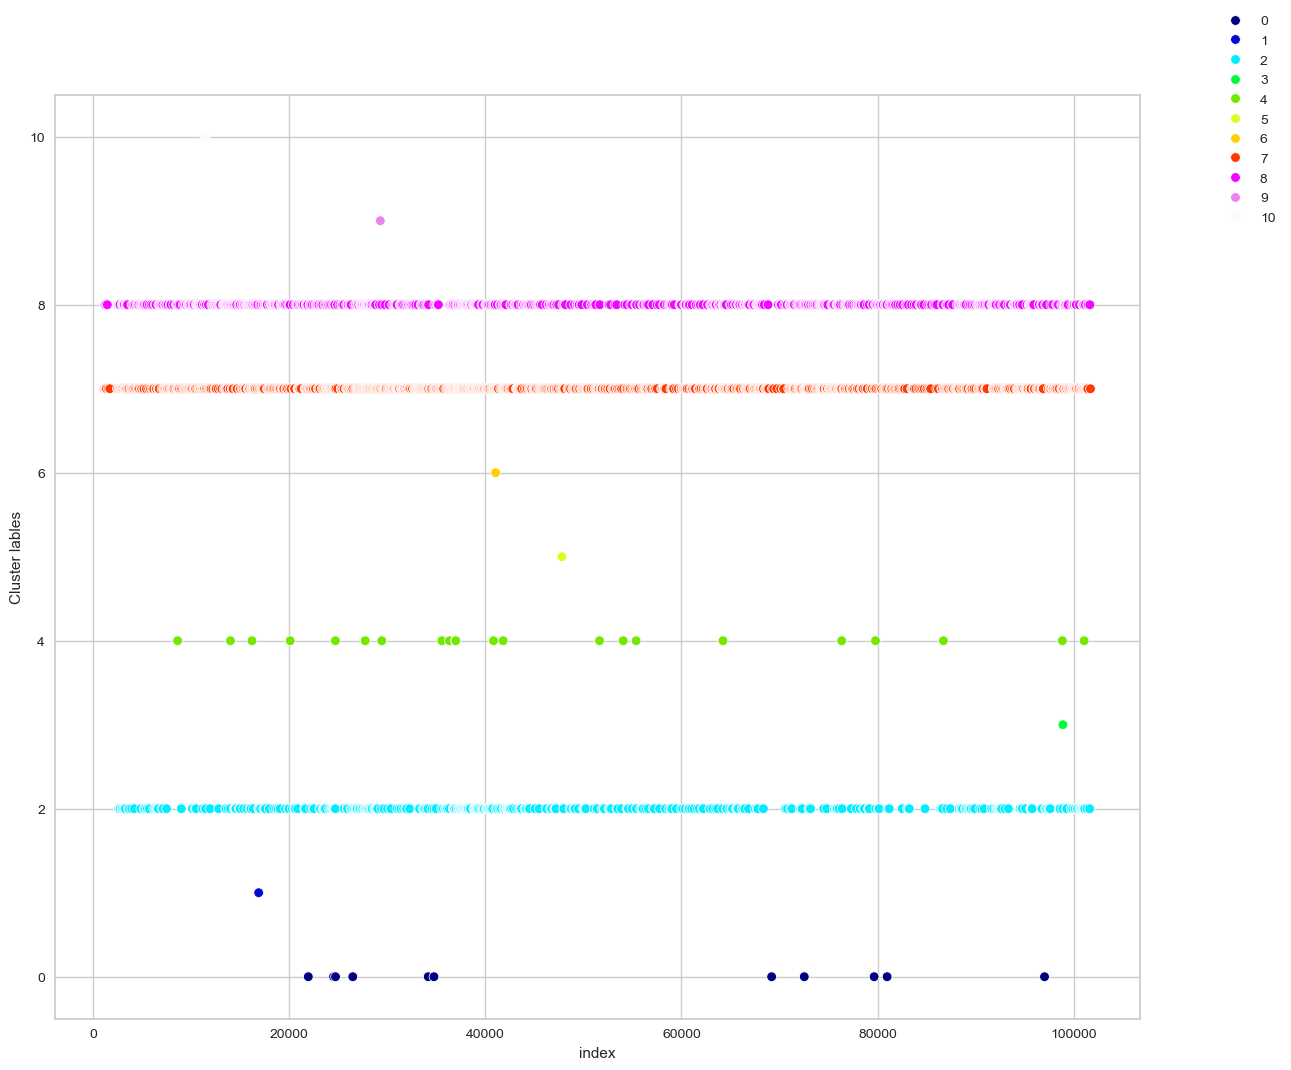

In [178]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.get_cmap("gist_ncar", 11) 
palette = [cmap(i) for i in range(11)]

cmap = plt.get_cmap("gist_ncar", 11 * 5)  # Sample from a wider range

# Create count plot
ax = sns.scatterplot(df, x=df.index, y='cluster_11', hue='cluster_11', legend=True, palette=palette)

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('Cluster lables')

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()

## Agglomerative Clustering

In [179]:
ac = AgglomerativeClustering(n_clusters= 16, metric='euclidean', linkage='ward')
ac.fit(X_scaled)

df['cluster_ac'] = ac.labels_
df['cluster_ac']

1102      0
1132      0
1136      0
1190      0
1204      0
         ..
101456    0
101516    0
101640    0
101667    0
101723    0
Name: cluster_ac, Length: 3036, dtype: int64

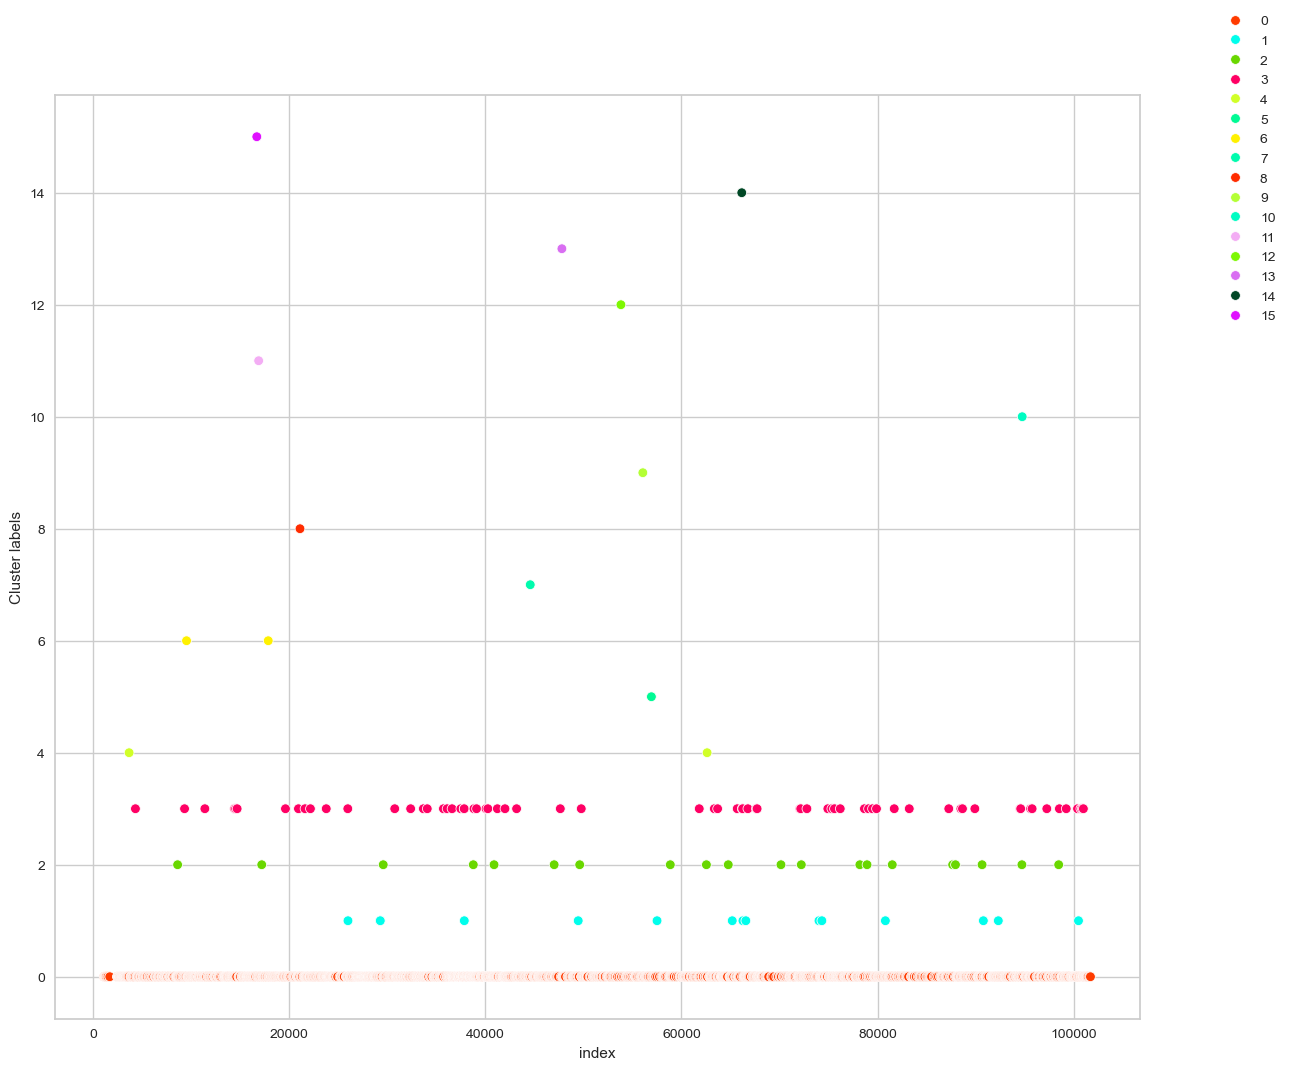

In [180]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.get_cmap("gist_ncar", 16) 
palette = [cmap(i) for i in range(16)]

cmap = plt.get_cmap("gist_ncar", 16 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 16, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df, x=df.index, y='cluster_ac', hue='cluster_ac', legend=True, palette=palette)

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('Cluster labels')

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()

### Summary of K mean Clustering Results with K= 16

The clustering analysis produced the following clusters:
| Cluster | Size | <30 Day Readmissions | Readmission Rate |
|---------|------|----------------------|------------------|
| 0       | 593  | 50                   | 8.43%            |
| 1       | 440  | 55                   | 12.50%           |
| 2       | 111  | 31                   | 27.93%           |
| 3       | 3    | 1                    | 33.33%           |
| 4       | 210  | 26                   | 12.38%           |
| 5       | 214  | 21                   | 9.81%            |
| 6       | 105  | 11                   | 10.48%           |
| 7       | 2    | 1                    | 50.00%           |
| 8       | 146  | 14                   | 9.59%            |
| 9       | 302  | 11                   | 3.64%            |
| 10      | 1    | 0                    | 0.00%            |
| 11      | 14   | 1                    | 7.14%            |
| 12      | 29   | 2                    | 6.90%            |
| 13      | 390  | 54                   | 13.85%           |


## Patient Cluster Characteristics

Based on the clustering results, here are some high-level features on the patient characteristics in each cluster:

- **Cluster 0:**  
  - **Demographics:** Mostly Caucasian with a mix of genders 
  - **Age & Weight:** Patients aged between ~50–80, commonly with weight in the [75–100) range  
  - **Hospital Stay:** Moderate length of stay (3–6 days)

- **Cluster 1:**  
  - **Demographics:** Mostly Caucasian with some patients in their 20s  
  - **Hospital Stay:** Generally around 1–12 days stay

- **Cluster 2 & 3:**  
  - **Demographics:** Older patients with higher readmission rates (up to 27–33%).  
  - **Clinical Notes:** These clusters may require closer follow-up given the increased risk of readmission.

- **Cluster 4:**  
  - **Demographics:** Older population with varied weight ranges and moderate hospital stays.  
  - **Observations:** Shows a balanced mix of lab and procedural counts.

- **Clusters 5–15:**  
  - **Variations:** These clusters differentiate further based on subtle demographic and clinical nuances (e.g., length of stay, outpatient visits, and medication counts) with readmission rates ranging from as low as 0% (Cluster 10) to 50% (Cluster 7).  
  - **Note:** Some clusters are very small (e.g., Cluster 3, Cluster 7) and might represent outlier groups.